In [259]:
import pandas as pd
import seaborn as sbs
import numpy as np
import matplotlib.pyplot as plt
import requests
import warnings
import plotly.express as px
import plotly.graph_objects as go

In [260]:
# Assuming 'data' is initially loaded from a CSV file or another data source #-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
data = pd.read_csv('IPL PROJECT_1.csv')
data.head(3)

,Unnamed: 0,season,id,name,short_name,description,home_team,away_team,toss_won,decision,1st_inning_score,2nd_inning_score,winner,result,start_date,end_date,venue_id,Unnamed: 17,venue_name,Venue,home_captain,away_captain,pom,points,super_over,home_overs,home_runs,home_wickets,home_boundaries,away_overs,away_runs,away_wickets,away_boundaries,highlights,home_key_batsman,home_key_bowler,home_playx1,away_playx1,away_key_batsman,away_key_bowler,match_days,umpire1,umpire2,tv_umpire,referee,reserve_umpire
0,1,2023,1359544,Royal Challengers Bangalore v Gujarat Titans,RCB v GT,"70th Match (N), Indian Premier League at Benga...",RCB,GT,GT,BOWL FIRST,197/5,198/4,GT,Titans won by 6 wkts (5b rem),2023-05-21T14:00Z,2023-05-22T23:59Z,57897,NaN,M.Chinnaswamy Stadium,Bengaluru,Faf du Plessis,Hardik Pandya,Shubman Gill,"Gujarat Titans 2, Royal Challengers Bangalore 0",False,20.0,197,5,28,19.1,198,4,25,Gill's second straight century trumps Kohli's ...,"Virat Kohli,Faf du Plessis","Mohammed Siraj,Harshal Patel","Virat Kohli (UKN),Faf du Plessis (UKN),Glenn M...","Wriddhiman Saha (WK),Shubman Gill (UKN),Vijay ...","Shubman Gill,Vijay Shankar","Noor Ahmad,Rashid Khan",21 May 2023 - night match (20-over match),Nitin Menon,Virender Sharma,Tapan Sharma,Javagal Srinath,VM Dhokre
1,2,2023,1359543,Mumbai Indians v Sunrisers Hyderabad,MI v SRH,"69th Match (D/N), Indian Premier League at Mum...",MI,SRH,MI,BOWL FIRST,200/5,201/2,MI,Mumbai won by 8 wkts (12b rem),2023-05-21T10:00Z,2023-05-22T23:59Z,58324,NaN,Wankhede Stadium,Mumbai,Rohit Sharma,Aiden Markram,Cameron Green,"Mumbai Indians 2, Sunrisers Hyderabad 0",False,18.0,201,2,31,20.0,200,5,27,Green century and Madhwal four-for help Mumbai...,"Cameron Green,Rohit Sharma","Akash Madhwal,Chris Jordan","Ishan Kishan (WK),Rohit Sharma (UKN),Cameron G...","Vivrant Sharma (AR),Mayank Agarwal (UKN),Heinr...","Mayank Agarwal,Vivrant Sharma","Bhuvneshwar Kumar,Mayank Dagar",21 May 2023 - day/night match (20-over match),KN Ananthapadmanabhan,Rod Tucker,Rohan Pandit,Pankaj Dharmani,Parashar Joshi
2,3,2023,1359542,Kolkata Knight Riders v Lucknow Super Giants,KKR v LSG,"68th Match (N), Indian Premier League at Kolka...",KKR,LSG,KKR,BOWL FIRST,176/8,175/7,LSG,Super Giants won by 1 run,2023-05-20T14:00Z,2023-05-21T23:59Z,57980,NaN,Eden Gardens,Kolkata,Nitish Rana,Krunal Pandya,Nicholas Pooran,"Lucknow Super Giants 2, Kolkata Knight Riders 0",False,20.0,175,7,24,20.0,176,8,22,"Pooran, Bishnoi seal Lucknow Super Giants' pla...","Rinku Singh,Jason Roy","Sunil Narine,Shardul Thakur","Jason Roy (UKN),Venkatesh Iyer (AR),Nitish Ran...","Karan Sharma (AR),Quinton de Kock (WK),Prerak ...","Nicholas Pooran,Quinton de Kock","Ravi Bishnoi,Yash Thakur",20 May 2023 - night match (20-over match),Ulhas Gandhe,Jayaraman Madanagopal,Yeshwant Barde,Manu Nayyar,Mohamed Rafi


In [261]:
# Dropping the 'Unnamed: 0' column
data.drop(columns=['Unnamed: 17'], inplace=True)

In [262]:
data.head(3)

,Unnamed: 0,season,id,name,short_name,description,home_team,away_team,toss_won,decision,1st_inning_score,2nd_inning_score,winner,result,start_date,end_date,venue_id,venue_name,Venue,home_captain,away_captain,pom,points,super_over,home_overs,home_runs,home_wickets,home_boundaries,away_overs,away_runs,away_wickets,away_boundaries,highlights,home_key_batsman,home_key_bowler,home_playx1,away_playx1,away_key_batsman,away_key_bowler,match_days,umpire1,umpire2,tv_umpire,referee,reserve_umpire
0,1,2023,1359544,Royal Challengers Bangalore v Gujarat Titans,RCB v GT,"70th Match (N), Indian Premier League at Benga...",RCB,GT,GT,BOWL FIRST,197/5,198/4,GT,Titans won by 6 wkts (5b rem),2023-05-21T14:00Z,2023-05-22T23:59Z,57897,M.Chinnaswamy Stadium,Bengaluru,Faf du Plessis,Hardik Pandya,Shubman Gill,"Gujarat Titans 2, Royal Challengers Bangalore 0",False,20.0,197,5,28,19.1,198,4,25,Gill's second straight century trumps Kohli's ...,"Virat Kohli,Faf du Plessis","Mohammed Siraj,Harshal Patel","Virat Kohli (UKN),Faf du Plessis (UKN),Glenn M...","Wriddhiman Saha (WK),Shubman Gill (UKN),Vijay ...","Shubman Gill,Vijay Shankar","Noor Ahmad,Rashid Khan",21 May 2023 - night match (20-over match),Nitin Menon,Virender Sharma,Tapan Sharma,Javagal Srinath,VM Dhokre
1,2,2023,1359543,Mumbai Indians v Sunrisers Hyderabad,MI v SRH,"69th Match (D/N), Indian Premier League at Mum...",MI,SRH,MI,BOWL FIRST,200/5,201/2,MI,Mumbai won by 8 wkts (12b rem),2023-05-21T10:00Z,2023-05-22T23:59Z,58324,Wankhede Stadium,Mumbai,Rohit Sharma,Aiden Markram,Cameron Green,"Mumbai Indians 2, Sunrisers Hyderabad 0",False,18.0,201,2,31,20.0,200,5,27,Green century and Madhwal four-for help Mumbai...,"Cameron Green,Rohit Sharma","Akash Madhwal,Chris Jordan","Ishan Kishan (WK),Rohit Sharma (UKN),Cameron G...","Vivrant Sharma (AR),Mayank Agarwal (UKN),Heinr...","Mayank Agarwal,Vivrant Sharma","Bhuvneshwar Kumar,Mayank Dagar",21 May 2023 - day/night match (20-over match),KN Ananthapadmanabhan,Rod Tucker,Rohan Pandit,Pankaj Dharmani,Parashar Joshi
2,3,2023,1359542,Kolkata Knight Riders v Lucknow Super Giants,KKR v LSG,"68th Match (N), Indian Premier League at Kolka...",KKR,LSG,KKR,BOWL FIRST,176/8,175/7,LSG,Super Giants won by 1 run,2023-05-20T14:00Z,2023-05-21T23:59Z,57980,Eden Gardens,Kolkata,Nitish Rana,Krunal Pandya,Nicholas Pooran,"Lucknow Super Giants 2, Kolkata Knight Riders 0",False,20.0,175,7,24,20.0,176,8,22,"Pooran, Bishnoi seal Lucknow Super Giants' pla...","Rinku Singh,Jason Roy","Sunil Narine,Shardul Thakur","Jason Roy (UKN),Venkatesh Iyer (AR),Nitish Ran...","Karan Sharma (AR),Quinton de Kock (WK),Prerak ...","Nicholas Pooran,Quinton de Kock","Ravi Bishnoi,Yash Thakur",20 May 2023 - night match (20-over match),Ulhas Gandhe,Jayaraman Madanagopal,Yeshwant Barde,Manu Nayyar,Mohamed Rafi


In [263]:
#---------------------------------------------------------------------------
data.columns

Index(['Unnamed: 0', 'season', 'id', 'name', 'short_name', 'description',
       'home_team', 'away_team', 'toss_won', 'decision', '1st_inning_score',
       '2nd_inning_score', 'winner', 'result', 'start_date', 'end_date',
       'venue_id', 'venue_name', 'Venue', 'home_captain', 'away_captain',
       'pom', 'points', 'super_over', 'home_overs', 'home_runs',
       'home_wickets', 'home_boundaries', 'away_overs', 'away_runs',
       'away_wickets', 'away_boundaries', 'highlights', 'home_key_batsman',
       'home_key_bowler', 'home_playx1', 'away_playx1', 'away_key_batsman',
       'away_key_bowler', 'match_days', 'umpire1', 'umpire2', 'tv_umpire',
       'referee', 'reserve_umpire'],
      dtype='object')

In [264]:
data.rename(columns={'decision':'TossDecision','toss_won':'TossWinner','winner':'WinningTeam','pom':'Player_of_Match'},inplace=True)

In [265]:
data.columns

Index(['Unnamed: 0', 'season', 'id', 'name', 'short_name', 'description',
       'home_team', 'away_team', 'TossWinner', 'TossDecision',
       '1st_inning_score', '2nd_inning_score', 'WinningTeam', 'result',
       'start_date', 'end_date', 'venue_id', 'venue_name', 'Venue',
       'home_captain', 'away_captain', 'Player_of_Match', 'points',
       'super_over', 'home_overs', 'home_runs', 'home_wickets',
       'home_boundaries', 'away_overs', 'away_runs', 'away_wickets',
       'away_boundaries', 'highlights', 'home_key_batsman', 'home_key_bowler',
       'home_playx1', 'away_playx1', 'away_key_batsman', 'away_key_bowler',
       'match_days', 'umpire1', 'umpire2', 'tv_umpire', 'referee',
       'reserve_umpire'],
      dtype='object')

In [266]:
data['TossDecision'].replace({'BOWL FIRST':'BOWL','BAT FIRST':'BAT'},inplace=True)

In [267]:
data.head(2)

,Unnamed: 0,season,id,name,short_name,description,home_team,away_team,TossWinner,TossDecision,1st_inning_score,2nd_inning_score,WinningTeam,result,start_date,end_date,venue_id,venue_name,Venue,home_captain,away_captain,Player_of_Match,points,super_over,home_overs,home_runs,home_wickets,home_boundaries,away_overs,away_runs,away_wickets,away_boundaries,highlights,home_key_batsman,home_key_bowler,home_playx1,away_playx1,away_key_batsman,away_key_bowler,match_days,umpire1,umpire2,tv_umpire,referee,reserve_umpire
0,1,2023,1359544,Royal Challengers Bangalore v Gujarat Titans,RCB v GT,"70th Match (N), Indian Premier League at Benga...",RCB,GT,GT,BOWL,197/5,198/4,GT,Titans won by 6 wkts (5b rem),2023-05-21T14:00Z,2023-05-22T23:59Z,57897,M.Chinnaswamy Stadium,Bengaluru,Faf du Plessis,Hardik Pandya,Shubman Gill,"Gujarat Titans 2, Royal Challengers Bangalore 0",False,20.0,197,5,28,19.1,198,4,25,Gill's second straight century trumps Kohli's ...,"Virat Kohli,Faf du Plessis","Mohammed Siraj,Harshal Patel","Virat Kohli (UKN),Faf du Plessis (UKN),Glenn M...","Wriddhiman Saha (WK),Shubman Gill (UKN),Vijay ...","Shubman Gill,Vijay Shankar","Noor Ahmad,Rashid Khan",21 May 2023 - night match (20-over match),Nitin Menon,Virender Sharma,Tapan Sharma,Javagal Srinath,VM Dhokre
1,2,2023,1359543,Mumbai Indians v Sunrisers Hyderabad,MI v SRH,"69th Match (D/N), Indian Premier League at Mum...",MI,SRH,MI,BOWL,200/5,201/2,MI,Mumbai won by 8 wkts (12b rem),2023-05-21T10:00Z,2023-05-22T23:59Z,58324,Wankhede Stadium,Mumbai,Rohit Sharma,Aiden Markram,Cameron Green,"Mumbai Indians 2, Sunrisers Hyderabad 0",False,18.0,201,2,31,20.0,200,5,27,Green century and Madhwal four-for help Mumbai...,"Cameron Green,Rohit Sharma","Akash Madhwal,Chris Jordan","Ishan Kishan (WK),Rohit Sharma (UKN),Cameron G...","Vivrant Sharma (AR),Mayank Agarwal (UKN),Heinr...","Mayank Agarwal,Vivrant Sharma","Bhuvneshwar Kumar,Mayank Dagar",21 May 2023 - day/night match (20-over match),KN Ananthapadmanabhan,Rod Tucker,Rohan Pandit,Pankaj Dharmani,Parashar Joshi


In [268]:
print(data.shape)
print(" -------------------- ")
print(data.isnull().sum())
print(" -------------------- ")
print(data.info())


(797, 45)
 -------------------- 
Unnamed: 0           0
season               0
id                   0
name                 0
short_name           0
description          0
home_team            0
away_team            0
TossWinner           0
TossDecision         0
1st_inning_score     0
2nd_inning_score     0
WinningTeam          0
result               0
start_date           0
end_date             0
venue_id             0
venue_name           0
Venue               66
home_captain         0
away_captain         0
Player_of_Match      0
points               0
super_over           0
home_overs           0
home_runs            0
home_wickets         0
home_boundaries      0
away_overs           0
away_runs            0
away_wickets         0
away_boundaries      0
highlights           0
home_key_batsman     0
home_key_bowler      0
home_playx1          0
away_playx1          0
away_key_batsman     0
away_key_bowler      0
match_days           0
umpire1              0
umpire2              0
t

In [269]:
data['Venue'].fillna('NA', inplace=True)

In [270]:
data.isnull().sum()

Unnamed: 0          0
season              0
id                  0
name                0
short_name          0
description         0
home_team           0
away_team           0
TossWinner          0
TossDecision        0
1st_inning_score    0
2nd_inning_score    0
WinningTeam         0
result              0
start_date          0
end_date            0
venue_id            0
venue_name          0
Venue               0
home_captain        0
away_captain        0
Player_of_Match     0
points              0
super_over          0
home_overs          0
home_runs           0
home_wickets        0
home_boundaries     0
away_overs          0
away_runs           0
away_wickets        0
away_boundaries     0
highlights          0
home_key_batsman    0
home_key_bowler     0
home_playx1         0
away_playx1         0
away_key_batsman    0
away_key_bowler     0
match_days          0
umpire1             0
umpire2             0
tv_umpire           0
referee             0
reserve_umpire      0
dtype: int

In [271]:
data.drop(columns=['Unnamed: 0'], inplace=True)

In [272]:
#-----------------------------------------------------------------------------------------------------------------
balls = pd.read_csv('balls.csv')
balls.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [273]:
data['home_team'].unique()

array(['RCB', 'MI', 'KKR', 'DC', 'PBKS', 'SRH', 'LSG', 'GT', 'CSK', 'RR'],
      dtype=object)

In [274]:
data['WinningTeam'].unique()

array(['GT', 'MI', 'LSG', 'CSK', 'RR', 'RCB', 'DC', 'KKR', 'PBKS', 'SRH'],
      dtype=object)

In [275]:
data[['Team1', 'Team2']] = data['name'].str.split(' v ', expand=True)
data.head(2)

,season,id,name,short_name,description,home_team,away_team,TossWinner,TossDecision,1st_inning_score,2nd_inning_score,WinningTeam,result,start_date,end_date,venue_id,venue_name,Venue,home_captain,away_captain,Player_of_Match,points,super_over,home_overs,home_runs,home_wickets,home_boundaries,away_overs,away_runs,away_wickets,away_boundaries,highlights,home_key_batsman,home_key_bowler,home_playx1,away_playx1,away_key_batsman,away_key_bowler,match_days,umpire1,umpire2,tv_umpire,referee,reserve_umpire,Team1,Team2
0,2023,1359544,Royal Challengers Bangalore v Gujarat Titans,RCB v GT,"70th Match (N), Indian Premier League at Benga...",RCB,GT,GT,BOWL,197/5,198/4,GT,Titans won by 6 wkts (5b rem),2023-05-21T14:00Z,2023-05-22T23:59Z,57897,M.Chinnaswamy Stadium,Bengaluru,Faf du Plessis,Hardik Pandya,Shubman Gill,"Gujarat Titans 2, Royal Challengers Bangalore 0",False,20.0,197,5,28,19.1,198,4,25,Gill's second straight century trumps Kohli's ...,"Virat Kohli,Faf du Plessis","Mohammed Siraj,Harshal Patel","Virat Kohli (UKN),Faf du Plessis (UKN),Glenn M...","Wriddhiman Saha (WK),Shubman Gill (UKN),Vijay ...","Shubman Gill,Vijay Shankar","Noor Ahmad,Rashid Khan",21 May 2023 - night match (20-over match),Nitin Menon,Virender Sharma,Tapan Sharma,Javagal Srinath,VM Dhokre,Royal Challengers Bangalore,Gujarat Titans
1,2023,1359543,Mumbai Indians v Sunrisers Hyderabad,MI v SRH,"69th Match (D/N), Indian Premier League at Mum...",MI,SRH,MI,BOWL,200/5,201/2,MI,Mumbai won by 8 wkts (12b rem),2023-05-21T10:00Z,2023-05-22T23:59Z,58324,Wankhede Stadium,Mumbai,Rohit Sharma,Aiden Markram,Cameron Green,"Mumbai Indians 2, Sunrisers Hyderabad 0",False,18.0,201,2,31,20.0,200,5,27,Green century and Madhwal four-for help Mumbai...,"Cameron Green,Rohit Sharma","Akash Madhwal,Chris Jordan","Ishan Kishan (WK),Rohit Sharma (UKN),Cameron G...","Vivrant Sharma (AR),Mayank Agarwal (UKN),Heinr...","Mayank Agarwal,Vivrant Sharma","Bhuvneshwar Kumar,Mayank Dagar",21 May 2023 - day/night match (20-over match),KN Ananthapadmanabhan,Rod Tucker,Rohan Pandit,Pankaj Dharmani,Parashar Joshi,Mumbai Indians,Sunrisers Hyderabad


In [276]:
data['Team1'].unique()

array(['Royal Challengers Bangalore', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Delhi Capitals', 'Punjab Kings',
       'Sunrisers Hyderabad', 'Lucknow Super Giants', 'Gujarat Titans',
       'Chennai Super Kings', 'Rajasthan Royals'], dtype=object)

In [277]:
data['Team2'].unique()

array(['Gujarat Titans', 'Sunrisers Hyderabad', 'Lucknow Super Giants',
       'Chennai Super Kings', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Delhi Capitals', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Punjab Kings'], dtype=object)

In [278]:
pd.set_option('display.max_columns', None)

In [279]:
data.head()

,season,id,name,short_name,description,home_team,away_team,TossWinner,TossDecision,1st_inning_score,2nd_inning_score,WinningTeam,result,start_date,end_date,venue_id,venue_name,Venue,home_captain,away_captain,Player_of_Match,points,super_over,home_overs,home_runs,home_wickets,home_boundaries,away_overs,away_runs,away_wickets,away_boundaries,highlights,home_key_batsman,home_key_bowler,home_playx1,away_playx1,away_key_batsman,away_key_bowler,match_days,umpire1,umpire2,tv_umpire,referee,reserve_umpire,Team1,Team2
0,2023,1359544,Royal Challengers Bangalore v Gujarat Titans,RCB v GT,"70th Match (N), Indian Premier League at Benga...",RCB,GT,GT,BOWL,197/5,198/4,GT,Titans won by 6 wkts (5b rem),2023-05-21T14:00Z,2023-05-22T23:59Z,57897,M.Chinnaswamy Stadium,Bengaluru,Faf du Plessis,Hardik Pandya,Shubman Gill,"Gujarat Titans 2, Royal Challengers Bangalore 0",False,20.0,197,5,28,19.1,198,4,25,Gill's second straight century trumps Kohli's ...,"Virat Kohli,Faf du Plessis","Mohammed Siraj,Harshal Patel","Virat Kohli (UKN),Faf du Plessis (UKN),Glenn M...","Wriddhiman Saha (WK),Shubman Gill (UKN),Vijay ...","Shubman Gill,Vijay Shankar","Noor Ahmad,Rashid Khan",21 May 2023 - night match (20-over match),Nitin Menon,Virender Sharma,Tapan Sharma,Javagal Srinath,VM Dhokre,Royal Challengers Bangalore,Gujarat Titans
1,2023,1359543,Mumbai Indians v Sunrisers Hyderabad,MI v SRH,"69th Match (D/N), Indian Premier League at Mum...",MI,SRH,MI,BOWL,200/5,201/2,MI,Mumbai won by 8 wkts (12b rem),2023-05-21T10:00Z,2023-05-22T23:59Z,58324,Wankhede Stadium,Mumbai,Rohit Sharma,Aiden Markram,Cameron Green,"Mumbai Indians 2, Sunrisers Hyderabad 0",False,18.0,201,2,31,20.0,200,5,27,Green century and Madhwal four-for help Mumbai...,"Cameron Green,Rohit Sharma","Akash Madhwal,Chris Jordan","Ishan Kishan (WK),Rohit Sharma (UKN),Cameron G...","Vivrant Sharma (AR),Mayank Agarwal (UKN),Heinr...","Mayank Agarwal,Vivrant Sharma","Bhuvneshwar Kumar,Mayank Dagar",21 May 2023 - day/night match (20-over match),KN Ananthapadmanabhan,Rod Tucker,Rohan Pandit,Pankaj Dharmani,Parashar Joshi,Mumbai Indians,Sunrisers Hyderabad
2,2023,1359542,Kolkata Knight Riders v Lucknow Super Giants,KKR v LSG,"68th Match (N), Indian Premier League at Kolka...",KKR,LSG,KKR,BOWL,176/8,175/7,LSG,Super Giants won by 1 run,2023-05-20T14:00Z,2023-05-21T23:59Z,57980,Eden Gardens,Kolkata,Nitish Rana,Krunal Pandya,Nicholas Pooran,"Lucknow Super Giants 2, Kolkata Knight Riders 0",False,20.0,175,7,24,20.0,176,8,22,"Pooran, Bishnoi seal Lucknow Super Giants' pla...","Rinku Singh,Jason Roy","Sunil Narine,Shardul Thakur","Jason Roy (UKN),Venkatesh Iyer (AR),Nitish Ran...","Karan Sharma (AR),Quinton de Kock (WK),Prerak ...","Nicholas Pooran,Quinton de Kock","Ravi Bishnoi,Yash Thakur",20 May 2023 - night match (20-over match),Ulhas Gandhe,Jayaraman Madanagopal,Yeshwant Barde,Manu Nayyar,Mohamed Rafi,Kolkata Knight Riders,Lucknow Super Giants
3,2023,1359541,Delhi Capitals v Chennai Super Kings,DC v CSK,"67th Match (D/N), Indian Premier League at Del...",DC,CSK,CSK,BAT,223/3,146/9,CSK,Super Kings won by 77 runs,2023-05-20T10:00Z,2023-05-21T23:59Z,58040,Arun Jaitley Stadium,Delhi,David Warner,MS Dhoni,Ruturaj Gaikwad,"Chennai Super Kings 2, Delhi Capitals 0",False,20.0,146,9,17,20.0,223,3,31,"Gaikwad, Conway script CSK's big win. For Delh...","David Warner,Axar Patel","Chetan Sakariya,Anrich Nortje","Prithvi Shaw (UKN),David Warner (UKN),Phil Sal...","Ruturaj Gaikwad (UKN),Devon Conway (UKN),Shiva...","Devon Conway,Ruturaj Gaikwad","Deepak Chahar,Matheesha Pathirana",20 May 2023 - day/night match (20-over match),Chris Gaffaney,Nikhil Patwardhan,Anil Chaudhary,Sanjay Verma,Mohit Krishnadas,Delhi Capitals,Chennai Super Kings
4,2023,1359540,Punjab Kings v Rajasthan Royals,PBKS v RR,"66th Match (N), Indian Premier League at Dhara...",PBKS,RR,RR,BOWL,187/5,189/6,RR,Royals won by 4 wkts (2b rem),2023-05-19T14:00Z,2023-05-20T23:59Z,58056,Himachal Pradesh Cricket Association Stadium,Dharamsala,Shikhar Dhawan,Sanju Samson,D

In [280]:
sample = ['season', 'id', 'Team1', 'Team2', 'home_team', 'away_team', 'TossWinner', 'TossDecision', '1st_inning_score', '2nd_inning_score', 'WinningTeam', 'Venue', 'Player_of_Match']
imp_data = data[sample]
imp_data.head(4)


,season,id,Team1,Team2,home_team,away_team,TossWinner,TossDecision,1st_inning_score,2nd_inning_score,WinningTeam,Venue,Player_of_Match
0,2023,1359544,Royal Challengers Bangalore,Gujarat Titans,RCB,GT,GT,BOWL,197/5,198/4,GT,Bengaluru,Shubman Gill
1,2023,1359543,Mumbai Indians,Sunrisers Hyderabad,MI,SRH,MI,BOWL,200/5,201/2,MI,Mumbai,Cameron Green
2,2023,1359542,Kolkata Knight Riders,Lucknow Super Giants,KKR,LSG,KKR,BOWL,176/8,175/7,LSG,Kolkata,Nicholas Pooran
3,2023,1359541,Delhi Capitals,Chennai Super Kings,DC,CSK,CSK,BAT,223/3,146/9,CSK,Delhi,Ruturaj Gaikwad


In [281]:
data["Team1"].unique()

array(['Royal Challengers Bangalore', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Delhi Capitals', 'Punjab Kings',
       'Sunrisers Hyderabad', 'Lucknow Super Giants', 'Gujarat Titans',
       'Chennai Super Kings', 'Rajasthan Royals'], dtype=object)

**TOSS RATIO**

In [282]:
c = data['TossDecision'].value_counts()
c

TossDecision
BOWL    511
BAT     286
Name: count, dtype: int64

In [283]:
decisions = c.index
decisions

Index(['BOWL', 'BAT'], dtype='object', name='TossDecision')

In [284]:
counts = c.values
counts

array([511, 286])

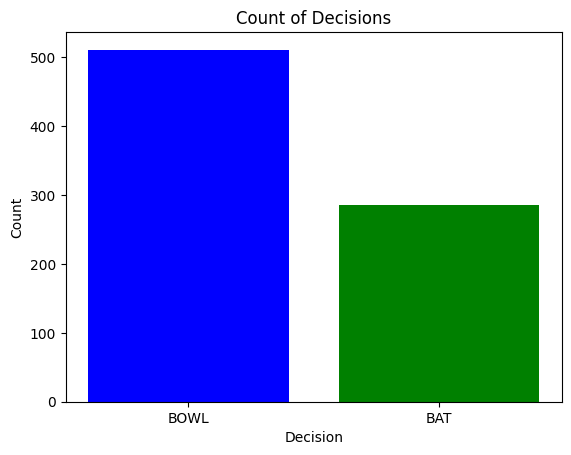

In [285]:
plt.bar(decisions, counts, color=['blue','green'])
plt.xlabel('Decision')
plt.ylabel('Count')
plt.title('Count of Decisions')
plt.show()

**Individual teams Winning the Toss**

In [286]:
toss = data['TossWinner'].value_counts()
toss

TossWinner
MI      109
DC      102
RCB      98
KKR      96
CSK      94
RR       94
SRH      92
PBKS     87
GT       17
LSG       8
Name: count, dtype: int64

In [287]:
team_name = toss.index
team_name

Index(['MI', 'DC', 'RCB', 'KKR', 'CSK', 'RR', 'SRH', 'PBKS', 'GT', 'LSG'], dtype='object', name='TossWinner')

In [288]:
toss_counts = toss.values
toss_counts

array([109, 102,  98,  96,  94,  94,  92,  87,  17,   8])

In [289]:
Matches_played_by_Teams = pd.concat([data['home_team'], data['away_team']])
Matches_played_by_Teams.value_counts()
l = Matches_played_by_Teams.value_counts()

In [290]:
Toss_win_Ratio = (toss/l)*100

In [291]:
Toss_win_Ratio

CSK     51.933702
DC      53.968254
GT      62.962963
KKR     48.000000
LSG     32.000000
MI      53.170732
PBKS    42.439024
RCB     50.256410
RR      52.222222
SRH     49.197861
Name: count, dtype: float64

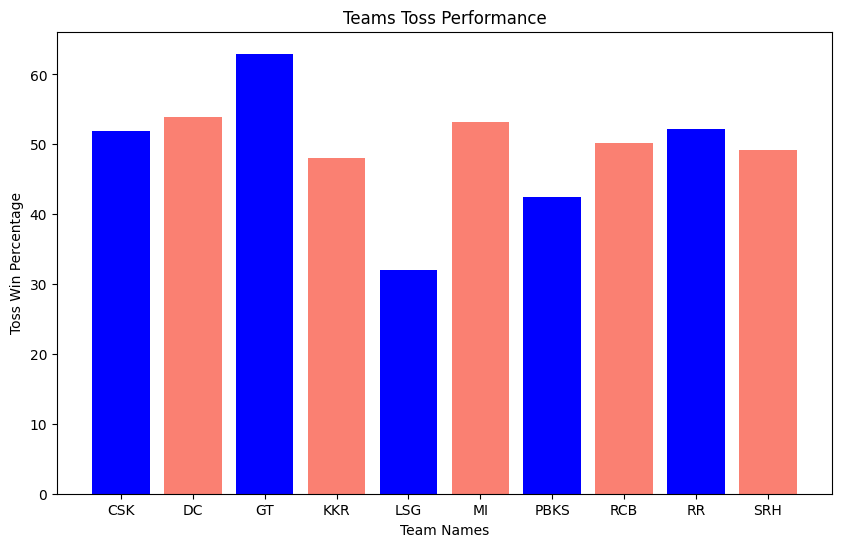

In [292]:
plt.figure(figsize=(10,6))
plt.bar(Toss_win_Ratio.index, Toss_win_Ratio, color=['blue','salmon'])

plt.xlabel('Team Names')
plt.ylabel('Toss Win Percentage')
plt.title('Teams Toss Performance')
plt.show()

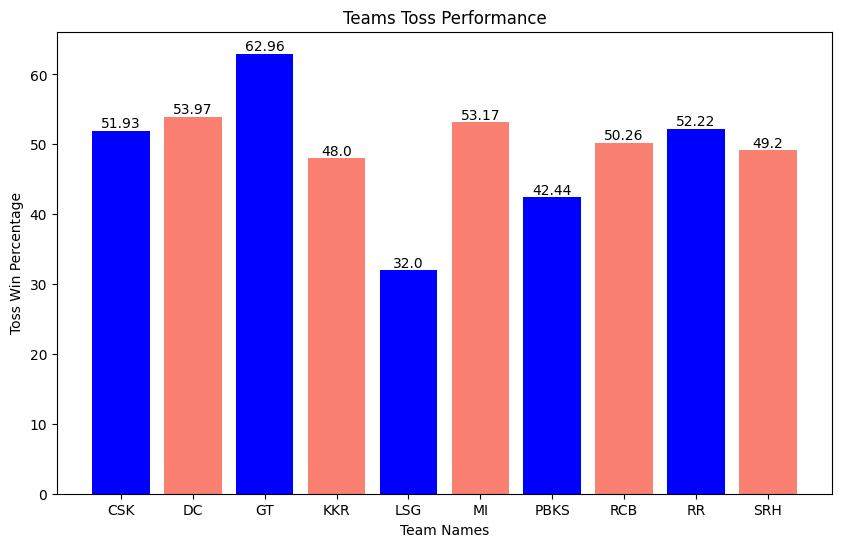

In [293]:
import matplotlib.pyplot as plt

Toss_win_Ratio = {
    'CSK': 51.933702,
    'DC': 53.968254,
    'GT': 62.962963,
    'KKR': 48.000000,
    'LSG': 32.000000,
    'MI': 53.170732,
    'PBKS': 42.439024,
    'RCB': 50.256410,
    'RR': 52.222222,
    'SRH': 49.197861
}

plt.figure(figsize=(10,6))
bars = plt.bar(Toss_win_Ratio.keys(), Toss_win_Ratio.values(), color=['blue','salmon'])

# Add values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.xlabel('Team Names')
plt.ylabel('Toss Win Percentage')
plt.title('Teams Toss Performance')
plt.show()


In [294]:
fig = px.pie(names=team_name, values=toss_counts, title='Pie Chart of Decisions')

fig.show()

In [295]:
fig = px.pie(names=team_name, values=Toss_win_Ratio, title='Pie Chart of Decisions')

fig.show()

In [296]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
season,797.0,2015.966123,4.750044,2008.0,2012.0,2016.0,2020.0,2023.0
id,797.0,893761.504391,357851.137195,335982.0,548335.0,980927.0,1216536.0,1359544.0
venue_id,797.0,113596.112923,153842.572180,57851.0,57991.0,58142.0,59079.0,1070094.0
home_overs,797.0,19.141907,1.913448,4.5,19.2,20.0,20.0,20.0
home_runs,797.0,159.894605,31.247093,58.0,140.0,161.0,181.0,246.0
home_wickets,797.0,5.756587,2.375751,0.0,4.0,6.0,8.0,10.0
home_boundaries,797.0,19.721455,5.850757,6.0,16.0,19.0,24.0,37.0
away_overs,797.0,19.095734,2.107085,4.2,19.2,20.0,20.0,20.0
away_runs,797.0,156.547051,31.493588,44.0,137.0,158.0,177.0,257.0
away_wickets,797.0,5.905897,2.506259,0.0,4.0,6.0,8.0,10.0


**Number of Wins by each Team**

In [297]:
winner_counts= data['WinningTeam'].value_counts()
winner_counts

WinningTeam
MI      117
CSK     105
KKR      98
PBKS     94
RCB      93
RR       87
SRH      84
DC       83
GT       20
LSG      16
Name: count, dtype: int64

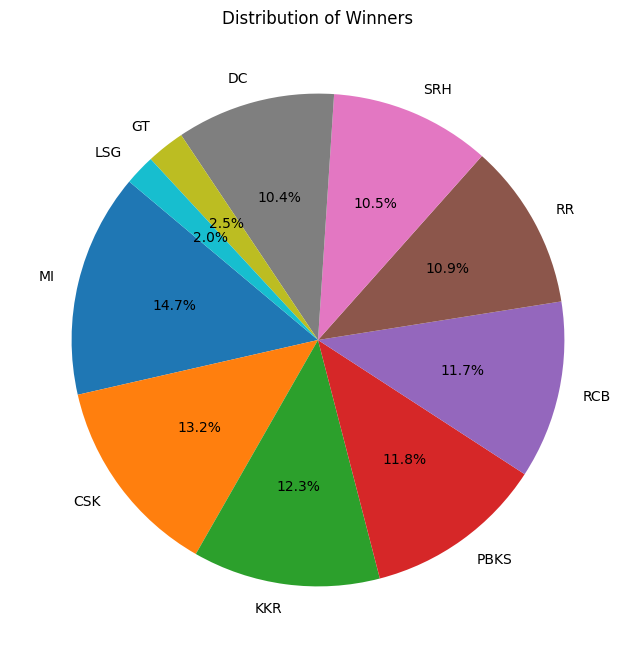

In [298]:
winning_teams = winner_counts.index
number_of_wins = winner_counts.values
# Creating the pie chart
plt.figure(figsize=(8, 8))
plt.pie(winner_counts, labels=winner_counts.index, autopct='%1.1f%%', startangle=140)

# Adding title
plt.title('Distribution of Winners')

# Displaying the plot
plt.show()

In [299]:
match_win_percentage = (winner_counts/l)*100
match_win_percentage

CSK     58.011050
DC      43.915344
GT      74.074074
KKR     49.000000
LSG     64.000000
MI      57.073171
PBKS    45.853659
RCB     47.692308
RR      48.333333
SRH     44.919786
Name: count, dtype: float64

In [300]:
import plotly.express as px

# Assuming match_win_percentage is a pandas Series with teams as index and win percentages as values

# Create bar plot
fig = px.bar(y=match_win_percentage.values, x=match_win_percentage.index,
             labels={'y': 'Win Percentage (%)', 'x': 'Teams'}, title='Match Win Percentage')

# Add values on top of the bars
for i, v in enumerate(match_win_percentage.values):
    fig.add_annotation(x=match_win_percentage.index[i], y=v + 1, text=f'{v:.2f}%', showarrow=False, font=dict(color='black', size=12))

# Show plot
fig.show()


In [301]:
data.columns

Index(['season', 'id', 'name', 'short_name', 'description', 'home_team',
       'away_team', 'TossWinner', 'TossDecision', '1st_inning_score',
       '2nd_inning_score', 'WinningTeam', 'result', 'start_date', 'end_date',
       'venue_id', 'venue_name', 'Venue', 'home_captain', 'away_captain',
       'Player_of_Match', 'points', 'super_over', 'home_overs', 'home_runs',
       'home_wickets', 'home_boundaries', 'away_overs', 'away_runs',
       'away_wickets', 'away_boundaries', 'highlights', 'home_key_batsman',
       'home_key_bowler', 'home_playx1', 'away_playx1', 'away_key_batsman',
       'away_key_bowler', 'match_days', 'umpire1', 'umpire2', 'tv_umpire',
       'referee', 'reserve_umpire', 'Team1', 'Team2'],
      dtype='object')

**How many Times does the Player geth the Player of the Title**

In [302]:
pom=data['Player_of_Match'].value_counts().head(20)
pom

Player_of_Match
AB de Villiers     19
Chris Gayle        16
Rohit Sharma       16
David Warner       15
Ravindra Jadeja    14
Virat Kohli        13
Shane Watson       12
KL Rahul           12
Yusuf Pathan       11
Shikhar Dhawan     11
MS Dhoni           11
Gautam Gambhir     11
Kieron Pollard     11
Michael Hussey     10
Ambati Rayudu      10
Jos Buttler        10
Andre Russell      10
Sunil Narine       10
Jacques Kallis     10
Umesh Yadav         9
Name: count, dtype: int64

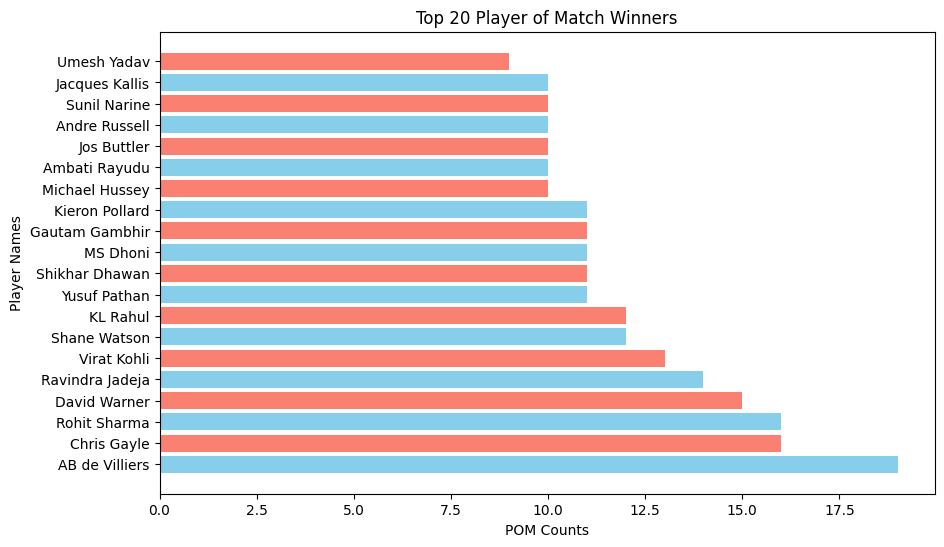

In [303]:
pom_names = pom.index
pom_counts = pom.values
plt.figure(figsize=(10,6))
plt.barh(pom_names, pom_counts, color=['skyblue','salmon'])

plt.xlabel('POM Counts')
plt.ylabel('Player Names')
plt.title('Top 20 Player of Match Winners')
plt.show()

In [304]:
import plotly.express as px

# Assuming you have already defined pom, pom_names, and pom_counts

# Create the bar plot with rainbow color scheme
fig = px.bar(pom, y=pom_names, x=pom_counts, orientation='h',
             labels={'x': 'Count', 'y': 'Player of the Match'}, title='Top 20 Player of the Match Winners',
             color=pom_counts, color_continuous_scale='rainbow')

fig.show()


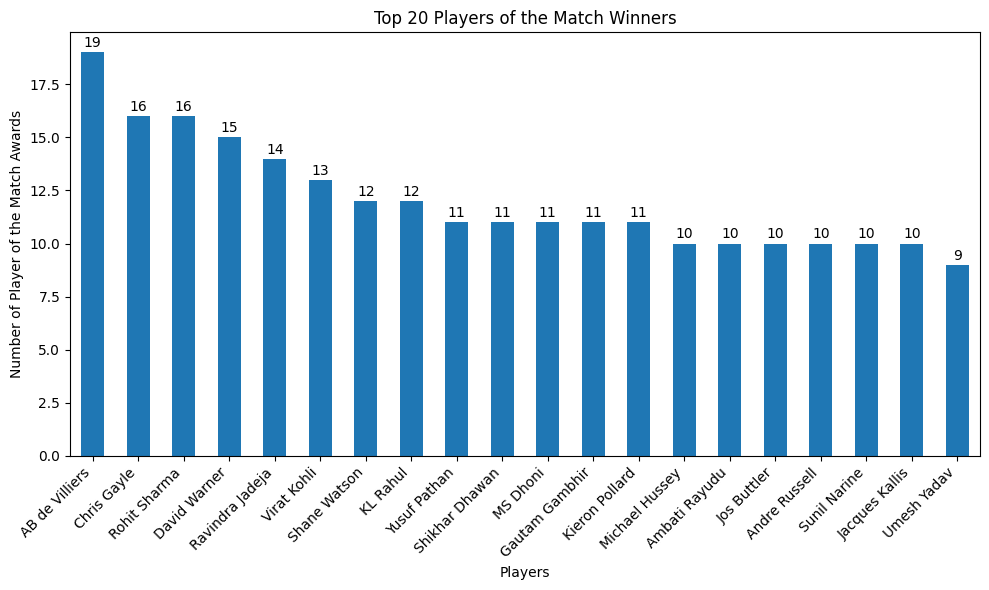

In [305]:
import matplotlib.pyplot as plt

# Data
pom = data['Player_of_Match'].value_counts().head(20)

# Plotting
plt.figure(figsize=(10, 6))
ax = pom.plot(kind='bar')

# Adding values on top of the bars
for i, v in enumerate(pom):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

plt.title('Top 20 Players of the Match Winners')
plt.xlabel('Players')
plt.ylabel('Number of Player of the Match Awards')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**MATCHES PLAYED IN GROUNDS**

In [306]:
match = data['venue_name'].value_counts()
match

venue_name
Wankhede Stadium                                                91
M.Chinnaswamy Stadium                                           67
Eden Gardens                                                    67
Arun Jaitley Stadium                                            66
MA Chidambaram Stadium                                          62
Rajiv Gandhi International Stadium                              54
Punjab Cricket Association IS Bindra Stadium                    53
Sawai Mansingh Stadium                                          46
Dubai International Cricket Stadium                             41
Sheikh Zayed Stadium                                            34
Sharjah Cricket Stadium                                         25
Brabourne Stadium                                               24
Dr DY Patil Sports Academy                                      23
Maharashtra Cricket Association Stadium                         22
Kingsmead                                          

In [307]:
fig = px.bar(match, y=match.index, x=match.values, orientation='h',
             labels={'x': 'Count', 'y': 'Venue of the Matches'}, title=' Most played Matches ')
fig.show()

In [308]:
import plotly.express as px
fig = px.bar(match, y=match.index, x=match.values, orientation='h',
             labels={'x': 'Count', 'y': 'Venue of the Matches'}, title=' Most played Matches ')
for i, v in enumerate(match.values):
    fig.add_annotation(x=v + 1, y=match.index[i], text=str(v), showarrow=False, font=dict(color='black', size=12))
fig.show()


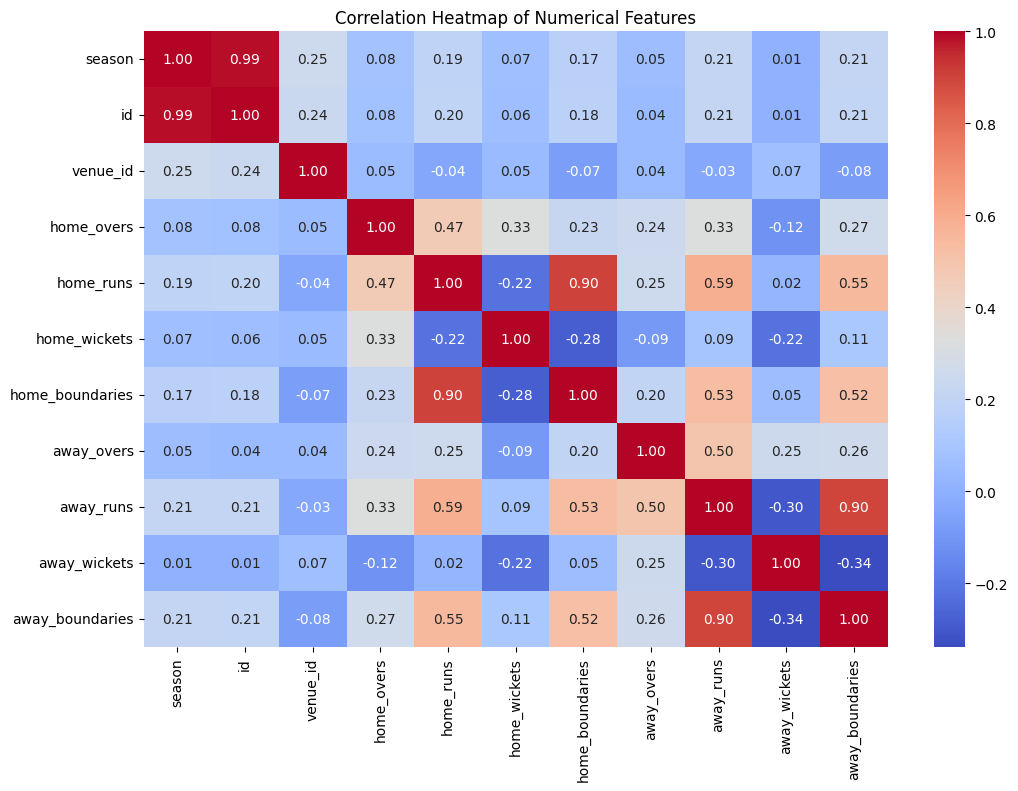

In [309]:
import seaborn as sns

# Select numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64'])

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


**Okey! Now we Have cleaned Match Dataframe, let's check the Ball by Ball Datafram and Build the Statistical Dataframe out of it so that we can build the Dashbaord or Perform Visualisation out of it.**

In [310]:
balls = pd.read_csv('balls.csv')
balls.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [311]:
balls['BattingTeam'].unique()

array(['Rajasthan Royals', 'Gujarat Titans',
       'Royal Challengers Bangalore', 'Lucknow Super Giants',
       'Sunrisers Hyderabad', 'Punjab Kings', 'Delhi Capitals',
       'Mumbai Indians', 'Chennai Super Kings', 'Kolkata Knight Riders',
       'Kings XI Punjab', 'Delhi Daredevils', 'Rising Pune Supergiant',
       'Gujarat Lions', 'Rising Pune Supergiants', 'Pune Warriors',
       'Deccan Chargers', 'Kochi Tuskers Kerala'], dtype=object)

In [313]:
balls['BattingTeam'] = balls['BattingTeam'].str.replace('Delhi Daredevils', 'Delhi Capitals')
balls['BattingTeam'] = balls['BattingTeam'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
balls['BattingTeam'] = balls['BattingTeam'].str.replace('Kings XI Punjab', 'Punjab Kings')
balls['BattingTeam'] = balls['BattingTeam'].str.replace('Rising Pune Supergiant', 'Chennai Super Kings')
balls['BattingTeam'] = balls['BattingTeam'].str.replace('Gujarat Lions', 'Gujarat Titans')
balls['BattingTeam'] = balls['BattingTeam'].str.replace('Rising Pune Supergiants', 'Chennai Super Kings')


In [315]:
balls['BattingTeam'].unique()

array(['Rajasthan Royals', 'Gujarat Titans',
       'Royal Challengers Bangalore', 'Lucknow Super Giants',
       'Sunrisers Hyderabad', 'Punjab Kings', 'Delhi Capitals',
       'Mumbai Indians', 'Chennai Super Kings', 'Kolkata Knight Riders',
       'Chennai Super Kingss', 'Pune Warriors', 'Kochi Tuskers Kerala'],
      dtype=object)

In [316]:

print(balls.shape)
print(" -------------------- ")
print(balls.isnull().sum())
print(" -------------------- ")
print(balls.info())

(225954, 17)
 -------------------- 
ID                        0
innings                   0
overs                     0
ballnumber                0
batter                    0
bowler                    0
non-striker               0
extra_type           213905
batsman_run               0
extras_run                0
total_run                 0
non_boundary              0
isWicketDelivery          0
player_out           214803
kind                 214803
fielders_involved    217966
BattingTeam               0
dtype: int64
 -------------------- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225954 entries, 0 to 225953
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ID                 225954 non-null  int64 
 1   innings            225954 non-null  int64 
 2   overs              225954 non-null  int64 
 3   ballnumber         225954 non-null  int64 
 4   batter             225954 non-null  object
 5   

In [317]:
batgroup = balls.groupby(['batter'])
batsman_Stats = pd.DataFrame(batgroup['ballnumber'].count()).rename(columns={'ballnumber':'Balls_Faced'})
batsman_Stats.head()

,Balls_Faced
batter,
A Ashish Reddy,196
A Badoni,139
A Chandila,7
A Chopra,75
A Choudhary,20


In [318]:
batsman_Stats['innings']=batgroup['innings'].nunique()
batsman_Stats['runs']=batgroup['batsman_run'].sum()
batsman_Stats['0s'] = balls[balls['batsman_run'] == 0].groupby('batter')['batsman_run'].count()
batsman_Stats['0s'].fillna(0,inplace=True)
batsman_Stats['1s'] = balls[balls['batsman_run'] == 1].groupby('batter')['batsman_run'].count()
batsman_Stats['1s'].fillna(0,inplace=True)

batsman_Stats['2s'] = balls[balls['batsman_run'] == 2].groupby('batter')['batsman_run'].count()
batsman_Stats['2s'].fillna(0,inplace=True)

batsman_Stats['3s'] = balls[balls['batsman_run'] == 3].groupby('batter')['batsman_run'].count()
batsman_Stats['3s'].fillna(0,inplace=True)

batsman_Stats['4s'] = balls[balls['batsman_run'] == 4].groupby('batter')['batsman_run'].count()
batsman_Stats['4s'].fillna(0,inplace=True)

batsman_Stats['6s'] = balls[balls['batsman_run'] == 6].groupby('batter')['batsman_run'].count()
batsman_Stats['6s'].fillna(0,inplace=True)
batsman_Stats['player_out']=batgroup['player_out'].count()
batsman_Stats.head()

,Balls_Faced,innings,runs,0s,1s,2s,3s,4s,6s,player_out
batter,,,,,,,,,,
A Ashish Reddy,196,2,280,61.0,83.0,20.0,1.0,16.0,15.0,15
A Badoni,139,2,161,57.0,53.0,11.0,0.0,11.0,7.0,9
A Chandila,7,1,4,3.0,4.0,0.0,0.0,0.0,0.0,1
A Chopra,75,2,53,45.0,21.0,2.0,0.0,7.0,0.0,5
A Choudhary,20,2,25,4.0,13.0,1.0,0.0,1.0,1.0,2


In [319]:

batsman_Stats['bat_average'] = round(batsman_Stats['runs']/batsman_Stats['player_out'],2)
batsman_Stats['bat_average'].fillna(0,inplace=True)
batsman_Stats['bat_strike'] = round(batsman_Stats['runs']/batsman_Stats['Balls_Faced']*100,2)
batsman_Stats['bat_strike'].fillna(0,inplace=True)
batsman_Stats.head()

,Balls_Faced,innings,runs,0s,1s,2s,3s,4s,6s,player_out,bat_average,bat_strike
batter,,,,,,,,,,,,
A Ashish Reddy,196,2,280,61.0,83.0,20.0,1.0,16.0,15.0,15,18.67,142.86
A Badoni,139,2,161,57.0,53.0,11.0,0.0,11.0,7.0,9,17.89,115.83
A Chandila,7,1,4,3.0,4.0,0.0,0.0,0.0,0.0,1,4.00,57.14
A Chopra,75,2,53,45.0,21.0,2.0,0.0,7.0,0.0,5,10.60,70.67
A Choudhary,20,2,25,4.0,13.0,1.0,0.0,1.0,1.0,2,12.50,125.00


In [320]:
batgroup = balls.groupby(['batter'])
batsman_Stats = pd.DataFrame(batgroup['ballnumber'].count()).rename(columns={'ballnumber':'Balls_Faced'})
batsman_Stats['innings']=batgroup['innings'].nunique()
batsman_Stats['runs']=batgroup['batsman_run'].sum()
batsman_Stats['0s'] = balls[balls['batsman_run'] == 0].groupby('batter')['batsman_run'].count()
batsman_Stats['0s'].fillna(0,inplace=True)
batsman_Stats['1s'] = balls[balls['batsman_run'] == 1].groupby('batter')['batsman_run'].count()
batsman_Stats['1s'].fillna(0,inplace=True)

batsman_Stats['2s'] = balls[balls['batsman_run'] == 2].groupby('batter')['batsman_run'].count()
batsman_Stats['2s'].fillna(0,inplace=True)

batsman_Stats['3s'] = balls[balls['batsman_run'] == 3].groupby('batter')['batsman_run'].count()
batsman_Stats['3s'].fillna(0,inplace=True)

batsman_Stats['4s'] = balls[balls['batsman_run'] == 4].groupby('batter')['batsman_run'].count()
batsman_Stats['4s'].fillna(0,inplace=True)

batsman_Stats['6s'] = balls[balls['batsman_run'] == 6].groupby('batter')['batsman_run'].count()
batsman_Stats['6s'].fillna(0,inplace=True)
batsman_Stats['player_out']=batgroup['player_out'].count()
batsman_Stats['bat_average'] = round(batsman_Stats['runs']/batsman_Stats['player_out'],2)
batsman_Stats['bat_average'].fillna(0,inplace=True)
batsman_Stats['bat_strike'] = round(batsman_Stats['runs']/batsman_Stats['Balls_Faced']*100,2)
batsman_Stats['bat_strike'].fillna(0,inplace=True)
batsman_Stats.head()

,Balls_Faced,innings,runs,0s,1s,2s,3s,4s,6s,player_out,bat_average,bat_strike
batter,,,,,,,,,,,,
A Ashish Reddy,196,2,280,61.0,83.0,20.0,1.0,16.0,15.0,15,18.67,142.86
A Badoni,139,2,161,57.0,53.0,11.0,0.0,11.0,7.0,9,17.89,115.83
A Chandila,7,1,4,3.0,4.0,0.0,0.0,0.0,0.0,1,4.00,57.14
A Chopra,75,2,53,45.0,21.0,2.0,0.0,7.0,0.0,5,10.60,70.67
A Choudhary,20,2,25,4.0,13.0,1.0,0.0,1.0,1.0,2,12.50,125.00


**So, Here we have Batsman Statistics, Now let's create Bowler Statistics**

In [321]:
bowlgroup = balls.groupby(['bowler'])
bowler_Stats = pd.DataFrame(bowlgroup['ballnumber'].count()).rename(columns={'ballnumber':'BallsThrow'})


In [322]:
balls['kind'].unique()

array([nan, 'caught', 'caught and bowled', 'run out', 'bowled', 'stumped',
       'lbw', 'hit wicket', 'retired hurt', 'retired out',
       'obstructing the field'], dtype=object)

In [323]:

# Get only useful Wicket and Outs
wickets_out = balls[balls['kind'].isin(['caught','bowled', 'lbw','stumped', 'caught and bowled', 'hit wicket'])]
bowler_Stats['wickets'] = wickets_out.groupby(['bowler'])['ballnumber'].count()
bowler_Stats['wickets'].fillna(0,inplace=True)
bowler_Stats['overs'] = round(bowler_Stats['BallsThrow']/6)
bowler_Stats['runs_conceded'] = balls.groupby('bowler')['batsman_run'].sum()
bowler_Stats['runs_conceded'] = bowler_Stats['runs_conceded'].fillna(0)
bowler_Stats.head()

,BallsThrow,wickets,overs,runs_conceded
bowler,,,,
A Ashish Reddy,270,18.0,45.0,386
A Badoni,12,2.0,2.0,11
A Chandila,234,11.0,39.0,242
A Choudhary,108,5.0,18.0,137
A Dananjaya,25,0.0,4.0,46


In [324]:
bowler_Stats['runs_conceded'] = bowler_Stats['runs_conceded'].add(balls[balls['extra_type'].isin(['wides','noballs'])].groupby('bowler')['extras_run'].sum(),fill_value=0)


In [325]:
bowler_Stats['bowl_econ'] = round(bowler_Stats['runs_conceded']/bowler_Stats['overs'],2)
bowler_Stats['bowl_strike_rate']=round(bowler_Stats['BallsThrow']/bowler_Stats['wickets'],2)
bowler_Stats.head()


,BallsThrow,wickets,overs,runs_conceded,bowl_econ,bowl_strike_rate
bowler,,,,,,
A Ashish Reddy,270,18.0,45.0,396.0,8.80,15.00
A Badoni,12,2.0,2.0,11.0,5.50,6.00
A Chandila,234,11.0,39.0,242.0,6.21,21.27
A Choudhary,108,5.0,18.0,144.0,8.00,21.60
A Dananjaya,25,0.0,4.0,47.0,11.75,inf


In [326]:
players_matches_dict = {}

# Iterate over each row in the dataframe
for i, row in balls.iterrows():
    # Check if the batter is already in the dictionary
    if row['batter'] in players_matches_dict:
        players_matches_dict[row['batter']].add(row['ID'])
    else:
        players_matches_dict[row['batter']] = {row['ID']}

    # Check if the non-striker is already in the dictionary
    if row['non-striker'] in players_matches_dict:
        players_matches_dict[row['non-striker']].add(row['ID'])
    else:
        players_matches_dict[row['non-striker']] = {row['ID']}

    # Check if the bowler is already in the dictionary
    if row['bowler'] in players_matches_dict:
        players_matches_dict[row['bowler']].add(row['ID'])
    else:
        players_matches_dict[row['bowler']] = {row['ID']}

# Create a dataframe with players and their number of matches
final_players_matches = pd.DataFrame({'Players': list(players_matches_dict.keys())})
final_players_matches['matches'] = final_players_matches['Players'].apply(lambda x: len(players_matches_dict[x]))
final_players_matches = final_players_matches.set_index('Players')

In [327]:
final_players_matches.head()

,matches
Players,
YBK Jaiswal,23
JC Buttler,81
Mohammed Shami,93
Yash Dayal,9
SV Samson,134


In [328]:
outbyCatch = balls[(balls['kind'].isin(['caught and bowled']))].groupby('bowler')['ballnumber'].count().rename('bowler_catches')
justCatch = balls[(balls['kind'].isin(['caught']))].groupby('fielders_involved')['ballnumber'].count().rename('fielder_catches')

catchDf = pd.merge(outbyCatch,justCatch, left_index=True, right_index=True,how='outer')
catchDf.fillna(0,inplace=True)
catchDf['catches'] = catchDf['bowler_catches']+catchDf['fielder_catches']
catchDf.drop(['bowler_catches','fielder_catches'],axis=1,inplace=True)

catchDf.head()

,catches
A Ashish Reddy,9.0
A Badoni,9.0
A Chandila,7.0
A Chopra,2.0
A Flintoff,4.0


**Now, We have Batsman, Bowler Statistics, Let's merge them using the Merge Function and make a full_fledge DataFrame with all information of players and then we get the Clusters of Best players out of all.**

In [329]:
# Merging Batsman Stats
final_df = pd.merge(final_players_matches,batsman_Stats, left_index=True, right_index=True,how='outer')
# Merging Bowler Stats
final_df = pd.merge(final_df,bowler_Stats, left_index=True, right_index=True,how='outer')
# Merging Catches Stats of Each Player
final_df = pd.merge(final_df,catchDf, left_index=True, right_index=True,how='outer')
# Merging the data of players who got Man of the Match of not
final_df = pd.merge(final_df,data['Player_of_Match'].value_counts(),left_index=True, right_index=True,how='left')
# Making all the NAN values to 0 because they don't have the values Like a person who does not get Player of the Match is marked as NaN so I Make it 0
final_df.fillna(0,inplace=True)

final_df.head()

,matches,Balls_Faced,innings,runs,0s,1s,2s,3s,4s,6s,player_out,bat_average,bat_strike,BallsThrow,wickets,overs,runs_conceded,bowl_econ,bowl_strike_rate,catches,count
A Ashish Reddy,28.0,196.0,2.0,280.0,61.0,83.0,20.0,1.0,16.0,15.0,15.0,18.67,142.86,270.0,18.0,45.0,396.0,8.80,15.00,9.0,0.0
A Badoni,11.0,139.0,2.0,161.0,57.0,53.0,11.0,0.0,11.0,7.0,9.0,17.89,115.83,12.0,2.0,2.0,11.0,5.50,6.00,9.0,0.0
A Chandila,12.0,7.0,1.0,4.0,3.0,4.0,0.0,0.0,0.0,0.0,1.0,4.00,57.14,234.0,11.0,39.0,242.0,6.21,21.27,7.0,0.0
A Chopra,6.0,75.0,2.0,53.0,45.0,21.0,2.0,0.0,7.0,0.0,5.0,10.60,70.67,0.0,0.0,0.0,0.0,0.00,0.00,2.0,0.0
A Choudhary,5.0,20.0,2.0,25.0,4.0,13.0,1.0,0.0,1.0,1.0,2.0,12.50,125.00,108.0,5.0,18.0,144.0,8.00,21.60,0.0,0.0


In [330]:
final_df.rename(columns={'count':'Player_of_Match'},inplace=True)
final_df.head(5)

,matches,Balls_Faced,innings,runs,0s,1s,2s,3s,4s,6s,player_out,bat_average,bat_strike,BallsThrow,wickets,overs,runs_conceded,bowl_econ,bowl_strike_rate,catches,Player_of_Match
A Ashish Reddy,28.0,196.0,2.0,280.0,61.0,83.0,20.0,1.0,16.0,15.0,15.0,18.67,142.86,270.0,18.0,45.0,396.0,8.80,15.00,9.0,0.0
A Badoni,11.0,139.0,2.0,161.0,57.0,53.0,11.0,0.0,11.0,7.0,9.0,17.89,115.83,12.0,2.0,2.0,11.0,5.50,6.00,9.0,0.0
A Chandila,12.0,7.0,1.0,4.0,3.0,4.0,0.0,0.0,0.0,0.0,1.0,4.00,57.14,234.0,11.0,39.0,242.0,6.21,21.27,7.0,0.0
A Chopra,6.0,75.0,2.0,53.0,45.0,21.0,2.0,0.0,7.0,0.0,5.0,10.60,70.67,0.0,0.0,0.0,0.0,0.00,0.00,2.0,0.0
A Choudhary,5.0,20.0,2.0,25.0,4.0,13.0,1.0,0.0,1.0,1.0,2.0,12.50,125.00,108.0,5.0,18.0,144.0,8.00,21.60,0.0,0.0


In [331]:
final_df['innings'].unique()

array([2., 1., 0., 4., 3., 5.])

**Great!! Now let's do some Data Visualisation to see Which player is Consistently good from 2008 to 2023.**

In [332]:
import plotly.express as px

In [333]:
import plotly.express as px

# Assuming you have already defined final_df with appropriate column names

# Create a bar plot
fig = px.bar(final_df, x='Player_of_Match', y='runs',
             title='Number of runs scored by different players who received Player of the Match',
             hover_name='Player_of_Match', color='runs',
             labels={'runs': 'Runs', 'player_of_the_match': 'Player of the Match'})

# Show the plot
fig.show()


In [334]:
# create a bar plot to see the Number of Wickets taken by different players and they get Player of Match
fig = px.bar(final_df, x='Player_of_Match', y='wickets', title='Number of Wickets taken by different players and they get Player of Match',hover_name=final_df.index,color='wickets')
# show the plot
fig.show()

In [335]:

# Create the scatter plot to see the Most Player of the Match by a Player
fig = px.scatter(final_df, x='matches', y='Player_of_Match',color='Player_of_Match',
                 size='Player_of_Match', hover_name=final_df.index, title='Player of the Match')
fig.update_layout(coloraxis=dict(colorscale='reds'))

# Show the plot
fig.show()

In [336]:
# Create the scatter plot to see Which player has best strike rate
fig = px.scatter(final_df, x='matches', y='bat_strike',color='bat_strike',
                 size='bat_strike', hover_name=final_df.index, title='Batsman Strike Rate')
fig.update_layout(coloraxis=dict(colorscale='reds'))

# Show the plot
fig.show()

In [337]:
# Create the scatter plot to see the Which Player got most Catches
fig = px.scatter(final_df, x='matches', y='catches',color='catches',
                 size='catches', hover_name=final_df.index, title='Most Catches by Players')
fig.update_layout(coloraxis=dict(colorscale='reds'))

# Show the plot
fig.show()

In [338]:

# Create the scatter plot to see the Bowling Economy by players
fig = px.scatter(final_df, x='matches', y='bowl_econ',color='bowl_econ',
                 size='matches', hover_name=final_df.index, title='Bowling Economy')
fig.update_layout(coloraxis=dict(colorscale='reds'))

# Show the plot
fig.show()

In [339]:
# Create the scatter plot to see the Most 6s by a Batsman
fig = px.scatter(final_df, x='matches', y='6s',color='6s',
                 size='6s', hover_name=final_df.index, title='Most 6s by a Batsman')
fig.update_layout(coloraxis=dict(colorscale='greens'))

# Show the plot
fig.show()

In [340]:

# Create the scatter plot to see the Most 4s by a Batsman
fig = px.scatter(final_df, x='matches', y='4s',color='4s',
                 size='4s', hover_name=final_df.index, title='Most 4s by a Batsman')
fig.update_layout(coloraxis=dict(colorscale='blues'))

# Show the plot
fig.show()

**As we see the best players in the IPL so far, Let's see the players who miss opportunities and score most time 0's to balls they faced or out most of the time in IPL so far.**

In [341]:
# Create the scatter plot to see the Most 0s on the balls they Faced by a Batsman
fig = px.scatter(final_df, x='matches', y='0s',color='0s',
                 size='0s', hover_name=final_df.index, title='Most 0s by a Batsman for each ball they face')
fig.update_layout(coloraxis=dict(colorscale='blues'))

# Show the plot
fig.show()

In [342]:

# Calculate the ratio of matches to player_out
final_df['not_out'] = final_df['matches'] - final_df['player_out']

# Create the scatter plot to see the Most Time Out by a Batsman
fig = px.scatter(final_df, x='player_out', y='not_out', color='runs',
                 size='player_out', hover_name=final_df.index,
                 title='Most Time Out by a Batsman vs Matches Played to Player Not Out Matches')
fig.update_layout(coloraxis=dict(colorscale='blues'))

# Show the plot
fig.show()

**So after getting to know about about players best and lost performances, Let's move to visualizing Which are top 10 Batsman, Bowlers, Strike Rate, Best Team.**

In [343]:
final_df = final_df[final_df['matches']>50]
final_df.head(3)

,matches,Balls_Faced,innings,runs,0s,1s,2s,3s,4s,6s,player_out,bat_average,bat_strike,BallsThrow,wickets,overs,runs_conceded,bowl_econ,bowl_strike_rate,catches,Player_of_Match,not_out
A Mishra,154.0,410.0,2.0,362.0,182.0,172.0,22.0,0.0,29.0,5.0,30.0,12.07,88.29,3317.0,166.0,553.0,3976.0,7.19,19.98,21.0,0.0,124.0
A Nehra,88.0,63.0,2.0,41.0,37.0,21.0,1.0,0.0,3.0,1.0,8.0,5.12,65.08,1974.0,106.0,329.0,2495.0,7.58,18.62,19.0,0.0,80.0
AB Dinda,76.0,50.0,2.0,26.0,31.0,16.0,1.0,0.0,2.0,0.0,9.0,2.89,52.00,1589.0,69.0,265.0,2073.0,7.82,23.03,7.0,0.0,67.0


In [346]:
import plotly.graph_objects as go
# Sort the dataframe by batting average and select the top 20
df_top20 = final_df.sort_values('bat_average', ascending=False).head(20)


# Create the plot using Plotly
fig = go.Figure(data=[go.Bar(
    x=df_top20.index, y=df_top20['bat_average'],
    text=df_top20['matches'].astype(str) + ' matches, ' + df_top20['runs'].astype(str) + ' runs, ' + df_top20['player_out'].astype(str) + ' outs, ' + df_top20['not_out'].astype(str) + ' not outs',
    textposition='auto',
    marker=dict(color=df_top20['bat_average'], coloraxis="coloraxis")
)])
fig.update_layout(title='Top 20 Batsmen based on Batting Average', xaxis_title="Player", yaxis_title="Batting Average")
fig.show()

In [347]:

import plotly.graph_objects as go
# Sort the dataframe by batting average and select the top 20
df_top20 = final_df.sort_values('wickets', ascending=False).head(20)


# Create the plot using Plotly
fig = go.Figure(data=[go.Bar(
    x=df_top20.index, y=df_top20['wickets'],
    text=df_top20['matches'].astype(str) + ' matches, ' + df_top20['wickets'].astype(str) + ' wickets, ' + df_top20['runs_conceded'].astype(str) + ' RunGive, ' + df_top20['BallsThrow'].astype(str) + ' BallsThrow',
    textposition='auto',
    marker=dict(color=df_top20['wickets'], coloraxis="coloraxis")
)])
fig.update_layout(title='Top 20 Bowler based on Wickets', xaxis_title="Player", yaxis_title="Wickets")
fig.show()


In [348]:
# Create a new column for the winning team
matches = data

matches["WinningTeam"] = matches.apply(lambda row: row["Team1"] if row["WinningTeam"] == "N" else row["Team2"], axis=1)

# Count the number of wins for each team
wins = matches["WinningTeam"].value_counts()

# Sort the teams by win percentage
win_percentages = wins.sort_values(ascending=False)

# Plot the results
import plotly.graph_objs as go

fig = go.Figure()
fig.add_trace(go.Bar(x=wins.index[:10], y=wins.values[:10], name="Win Percentage"))
fig.update_layout(title="Top 10 Best Performing Teams", xaxis_title="Team", yaxis_title="Win Percentage")
fig.show()

In [349]:
fig = go.Figure()
fig.add_trace(go.Bar(x=win_percentages.index[-10:], y=win_percentages.values[-10:], name="Win Percentage"))
fig.update_layout(title="Top 10 Least Performing Teams", xaxis_title="Team", yaxis_title="Win Percentage")
fig.show()

In [350]:

#matches = pd.read_csv('https://raw.githubusercontent.com/simranjeet97/IPL2023_WinningPrediction_EDA_Dashboard/main/IPL2023_Data/IPL_Matches_2008_2022.csv')
# First Drop the Unwanted Columns
#matches.drop(['City','ID','method'],axis=1,inplace=True)
#matches = matches.dropna()
#matches['SEASON_INT'] = matches['Season'].apply(lambda x: int(x[:4]))
#matches['SEASON_END_INT'] = matches['Season'].apply(lambda x: int('20'+str(x[5:])) if len(x)>5 else int(x[:4]))

# Convert the Date column to a datetime data type
#matches['Date'] = pd.to_datetime(matches['Date'])

# Group the data by season and select the last row of each group
#last_matches = matches.sort_values('Date').groupby('Season').tail(1)

# Select the Season and WinningTeam columns
#winning_teams = last_matches[['SEASON_END_INT', 'WinningTeam']]

In [351]:
data.head()

,season,id,name,short_name,description,home_team,away_team,TossWinner,TossDecision,1st_inning_score,2nd_inning_score,WinningTeam,result,start_date,end_date,venue_id,venue_name,Venue,home_captain,away_captain,Player_of_Match,points,super_over,home_overs,home_runs,home_wickets,home_boundaries,away_overs,away_runs,away_wickets,away_boundaries,highlights,home_key_batsman,home_key_bowler,home_playx1,away_playx1,away_key_batsman,away_key_bowler,match_days,umpire1,umpire2,tv_umpire,referee,reserve_umpire,Team1,Team2
0,2023,1359544,Royal Challengers Bangalore v Gujarat Titans,RCB v GT,"70th Match (N), Indian Premier League at Benga...",RCB,GT,GT,BOWL,197/5,198/4,Gujarat Titans,Titans won by 6 wkts (5b rem),2023-05-21T14:00Z,2023-05-22T23:59Z,57897,M.Chinnaswamy Stadium,Bengaluru,Faf du Plessis,Hardik Pandya,Shubman Gill,"Gujarat Titans 2, Royal Challengers Bangalore 0",False,20.0,197,5,28,19.1,198,4,25,Gill's second straight century trumps Kohli's ...,"Virat Kohli,Faf du Plessis","Mohammed Siraj,Harshal Patel","Virat Kohli (UKN),Faf du Plessis (UKN),Glenn M...","Wriddhiman Saha (WK),Shubman Gill (UKN),Vijay ...","Shubman Gill,Vijay Shankar","Noor Ahmad,Rashid Khan",21 May 2023 - night match (20-over match),Nitin Menon,Virender Sharma,Tapan Sharma,Javagal Srinath,VM Dhokre,Royal Challengers Bangalore,Gujarat Titans
1,2023,1359543,Mumbai Indians v Sunrisers Hyderabad,MI v SRH,"69th Match (D/N), Indian Premier League at Mum...",MI,SRH,MI,BOWL,200/5,201/2,Sunrisers Hyderabad,Mumbai won by 8 wkts (12b rem),2023-05-21T10:00Z,2023-05-22T23:59Z,58324,Wankhede Stadium,Mumbai,Rohit Sharma,Aiden Markram,Cameron Green,"Mumbai Indians 2, Sunrisers Hyderabad 0",False,18.0,201,2,31,20.0,200,5,27,Green century and Madhwal four-for help Mumbai...,"Cameron Green,Rohit Sharma","Akash Madhwal,Chris Jordan","Ishan Kishan (WK),Rohit Sharma (UKN),Cameron G...","Vivrant Sharma (AR),Mayank Agarwal (UKN),Heinr...","Mayank Agarwal,Vivrant Sharma","Bhuvneshwar Kumar,Mayank Dagar",21 May 2023 - day/night match (20-over match),KN Ananthapadmanabhan,Rod Tucker,Rohan Pandit,Pankaj Dharmani,Parashar Joshi,Mumbai Indians,Sunrisers Hyderabad
2,2023,1359542,Kolkata Knight Riders v Lucknow Super Giants,KKR v LSG,"68th Match (N), Indian Premier League at Kolka...",KKR,LSG,KKR,BOWL,176/8,175/7,Lucknow Super Giants,Super Giants won by 1 run,2023-05-20T14:00Z,2023-05-21T23:59Z,57980,Eden Gardens,Kolkata,Nitish Rana,Krunal Pandya,Nicholas Pooran,"Lucknow Super Giants 2, Kolkata Knight Riders 0",False,20.0,175,7,24,20.0,176,8,22,"Pooran, Bishnoi seal Lucknow Super Giants' pla...","Rinku Singh,Jason Roy","Sunil Narine,Shardul Thakur","Jason Roy (UKN),Venkatesh Iyer (AR),Nitish Ran...","Karan Sharma (AR),Quinton de Kock (WK),Prerak ...","Nicholas Pooran,Quinton de Kock","Ravi Bishnoi,Yash Thakur",20 May 2023 - night match (20-over match),Ulhas Gandhe,Jayaraman Madanagopal,Yeshwant Barde,Manu Nayyar,Mohamed Rafi,Kolkata Knight Riders,Lucknow Super Giants
3,2023,1359541,Delhi Capitals v Chennai Super Kings,DC v CSK,"67th Match (D/N), Indian Premier League at Del...",DC,CSK,CSK,BAT,223/3,146/9,Chennai Super Kings,Super Kings won by 77 runs,2023-05-20T10:00Z,2023-05-21T23:59Z,58040,Arun Jaitley Stadium,Delhi,David Warner,MS Dhoni,Ruturaj Gaikwad,"Chennai Super Kings 2, Delhi Capitals 0",False,20.0,146,9,17,20.0,223,3,31,"Gaikwad, Conway script CSK's big win. For Delh...","David Warner,Axar Patel","Chetan Sakariya,Anrich Nortje","Prithvi Shaw (UKN),David Warner (UKN),Phil Sal...","Ruturaj Gaikwad (UKN),Devon Conway (UKN),Shiva...","Devon Conway,Ruturaj Gaikwad","Deepak Chahar,Matheesha Pathirana",20 May 2023 - day/night match (20-over match),Chris Gaffaney,Nikhil Patwardhan,Anil Chaudhary,Sanjay Verma,Mohit Krishnadas,Delhi Capitals,Chennai Super Kings
4,2023,1359540,Punjab Kings v Rajasthan Royals,PBKS v RR,"66th Match (N), Indian Premier League at Dhara...",PBKS,RR,RR,BOWL,187/5,189/6,Rajasthan Royals,Royals won by 4 wkts (2b rem),2023-05-19T14:00Z,2023-05-20T23:59Z,58056,Himachal 

In [352]:
data['season'].unique()

array([2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013,
       2012, 2011, 2010, 2009, 2008])

**DOUBT START**

In [353]:
#matches['season'] = matches['season'].apply(lambda x: int(x[:4]))
#matches['season'] = matches['season'].apply(lambda x: int('20'+str(x[5:])) if len(x)>5 else int(x[:4]))
data['season'] = data['season'].astype(str)
# Convert the Date column to a datetime data type
data['start_date'] = pd.to_datetime(data['start_date'])

# Group the data by season and select the last row of each group
last_matches = data.sort_values('start_date').groupby('season').tail(1)

# Select the Season and WinningTeam columns
winning_teams = last_matches[['season', 'WinningTeam']]


In [354]:
winning_teams

,season,WinningTeam
796,2008,Rajasthan Royals
758,2009,Sunrisers Hyderabad
710,2010,Mumbai Indians
657,2011,Mumbai Indians
617,2012,Mumbai Indians
565,2013,Kolkata Knight Riders
512,2014,Rajasthan Royals
456,2015,Mumbai Indians
404,2016,Royal Challengers Bangalore
379,2017,Royal Challengers Bangalore


**DOUBT END**

In [355]:
matches['WinningTeam'].unique()

array(['Gujarat Titans', 'Sunrisers Hyderabad', 'Lucknow Super Giants',
       'Chennai Super Kings', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Delhi Capitals', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Punjab Kings'], dtype=object)

In [356]:

# Plot the most winning team for each year
fig = px.bar(winning_teams, x='WinningTeam', y='season', hover_name='WinningTeam',color='season')
fig.show()

In [357]:
import pandas as pd
import plotly.express as px

# Group the data by year ('season') and 'WinningTeam', count occurrences, and reset index
win_counts = matches.groupby(['season', 'WinningTeam']).size().reset_index(name='wins')

# Find the team with the maximum wins in each year
most_winning_teams = win_counts.loc[win_counts.groupby('season')['wins'].idxmax()]

# Plot the most winning team for each year
fig = px.bar(most_winning_teams, x='season', y='wins', color='WinningTeam',
             title='Most Winning Team for Each Year', labels={'wins': 'Wins', 'season': 'Year', 'WinningTeam': 'Team'})

fig.show()


In [358]:
balls.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [359]:
import pandas as pd
import plotly.express as px

# Group the data by year ('season') and 'WinningTeam', count occurrences, and reset index
win_counts = matches.groupby(['season', 'WinningTeam']).size().reset_index(name='wins')

# Find the team with the maximum wins in each year
most_winning_teams = win_counts.loc[win_counts.groupby('season')['wins'].idxmax()]

# Plot the most winning team for each year
fig = px.bar(most_winning_teams, x='season', y='wins', color='WinningTeam',
             title='Most Winning Team for Each Year', labels={'wins': 'Wins', 'season': 'Year', 'WinningTeam': 'Team'},
             text='WinningTeam')

fig.update_traces(textposition='outside')

fig.show()


**Let's find out the Best Players of Time using K-Means Clustering**

<Axes: >

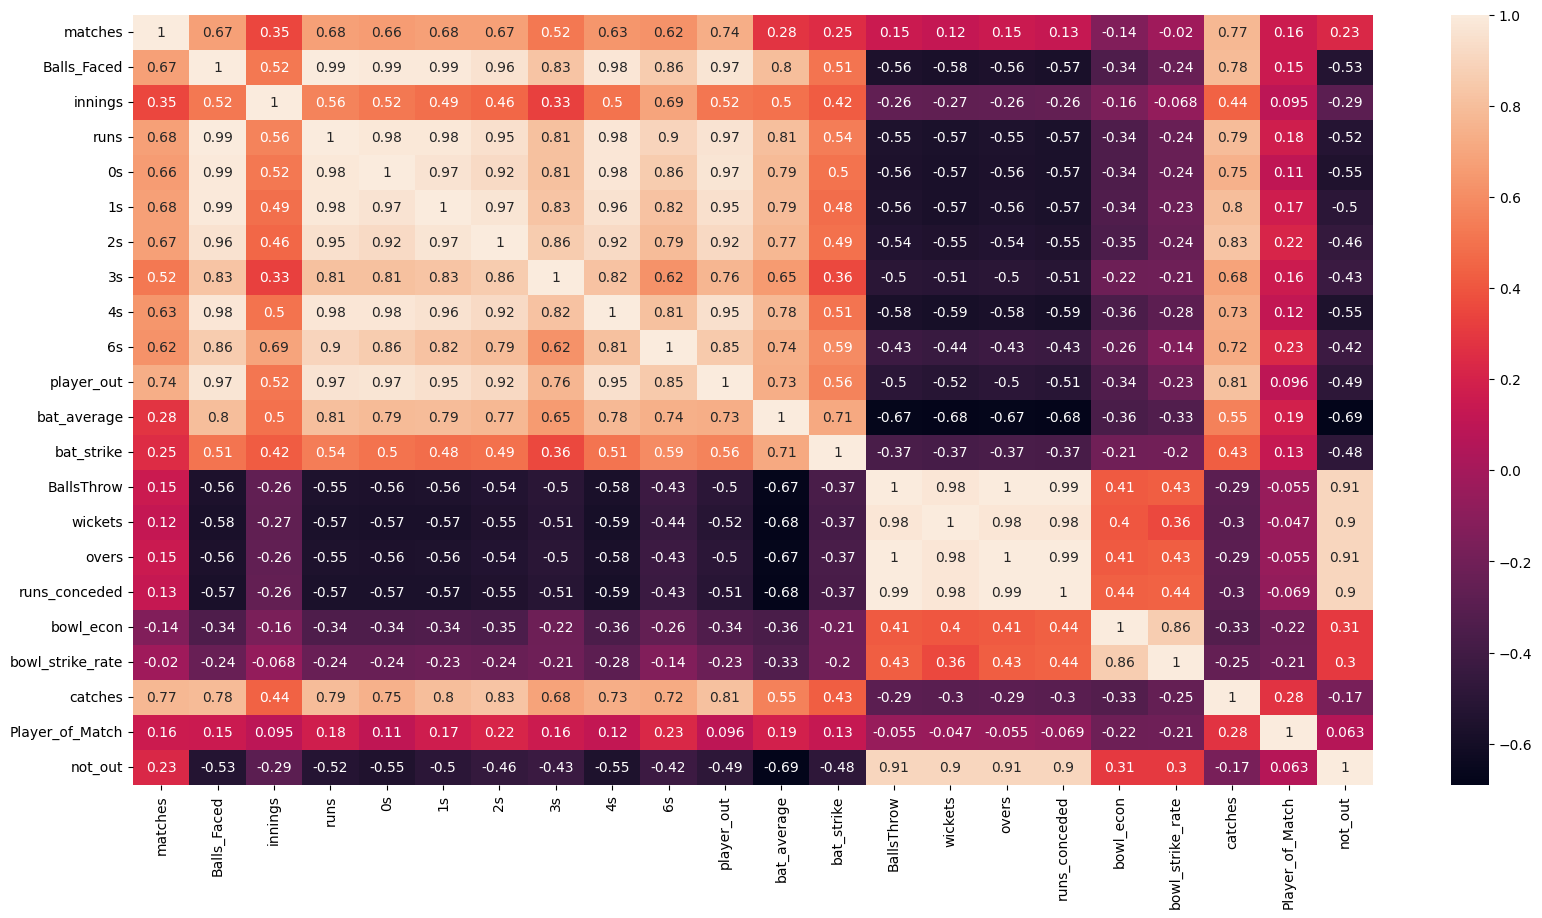

In [360]:
# Let's Remove the Most Correlated Columns
plt.figure(figsize=(20,10))
sns.heatmap(final_df.corr(),annot=True)

In [361]:
import numpy as np

def correlation(data, threshold):
    corr_matrix = data.corr()
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    col_corr = [col for col in upper_triangle.columns if any(upper_triangle[col] > threshold)]
    return col_corr

corr_cols = correlation(final_df, 0.85)
corr_cols


['runs',
 '0s',
 '1s',
 '2s',
 '3s',
 '4s',
 '6s',
 'player_out',
 'wickets',
 'overs',
 'runs_conceded',
 'bowl_strike_rate',
 'not_out']

In [362]:
top_columns =final_df.drop(['runs',
 '0s',
 '1s',
 '2s',
 '3s',
 '4s',
 '6s',
 'player_out',
 'wickets',
 'overs',
 'runs_conceded',
 'bowl_strike_rate',
 'not_out'],axis=1)


In [363]:
final_df_new = top_columns[np.isfinite(top_columns).all(1)]
final_df_new.head()

,matches,Balls_Faced,innings,bat_average,bat_strike,BallsThrow,bowl_econ,catches,Player_of_Match
A Mishra,154.0,410.0,2.0,12.07,88.29,3317.0,7.19,21.0,0.0
A Nehra,88.0,63.0,2.0,5.12,65.08,1974.0,7.58,19.0,0.0
AB Dinda,76.0,50.0,2.0,2.89,52.00,1589.0,7.82,7.0,0.0
AB de Villiers,170.0,3487.0,4.0,41.45,148.58,0.0,0.00,120.0,19.0
AC Gilchrist,80.0,1555.0,2.0,27.22,133.05,1.0,0.00,51.0,0.0


In [364]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [365]:
scaler = StandardScaler()
scaled_data = pd.DataFrame(
    scaler.fit_transform(final_df_new),
    columns=top_columns.columns,
    index=final_df_new.index
)
scaled_data.head()


,matches,Balls_Faced,innings,bat_average,bat_strike,BallsThrow,bowl_econ,catches,Player_of_Match
A Mishra,1.284238,-0.698228,-0.509563,-0.865744,-1.059655,2.127278,0.310825,-0.588725,-0.279255
A Nehra,-0.292123,-0.986563,-0.509563,-1.530885,-2.001902,0.859354,0.417325,-0.663943,-0.279255
AB Dinda,-0.578734,-0.997365,-0.509563,-1.744305,-2.532906,0.495876,0.482864,-1.115251,-0.279255
AB de Villiers,1.666387,1.858559,2.571516,1.946034,1.387913,-1.004295,-1.652602,3.134565,7.218134
AC Gilchrist,-0.483197,0.253192,-0.509563,0.584169,0.757448,-1.003351,-1.652602,0.539544,-0.279255


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

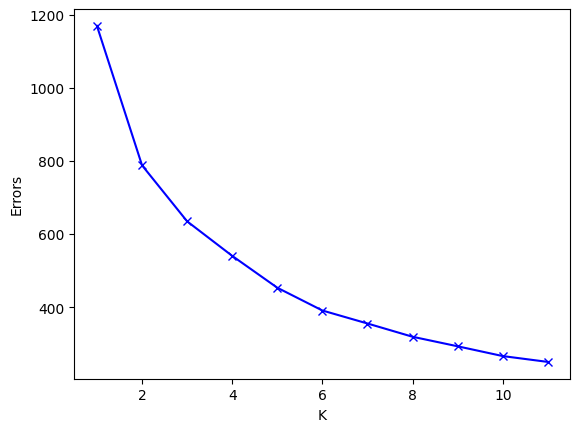

In [366]:
clusters=range(1,12)
errors=[]
for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(scaled_data)
    errors.append(model.inertia_)
plt.xlabel('K')
plt.ylabel('Errors')
plt.plot(clusters,errors,'bx-')


In [367]:
model = KMeans(n_clusters = 4)
y_pred = model.fit_predict(scaled_data)
final_df_new['cluster'] = y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

<ipython-input-367-9252182c99d1>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [368]:
final_df_new.head()

,matches,Balls_Faced,innings,bat_average,bat_strike,BallsThrow,bowl_econ,catches,Player_of_Match,cluster
A Mishra,154.0,410.0,2.0,12.07,88.29,3317.0,7.19,21.0,0.0,1
A Nehra,88.0,63.0,2.0,5.12,65.08,1974.0,7.58,19.0,0.0,1
AB Dinda,76.0,50.0,2.0,2.89,52.00,1589.0,7.82,7.0,0.0,1
AB de Villiers,170.0,3487.0,4.0,41.45,148.58,0.0,0.00,120.0,19.0,3
AC Gilchrist,80.0,1555.0,2.0,27.22,133.05,1.0,0.00,51.0,0.0,2


In [369]:

final_df_new.reset_index(inplace=True)
topPlayers = final_df_new.rename(columns = {'index':'PlayerNames'})
topPlayers_cluster = pd.DataFrame(topPlayers[['PlayerNames','cluster']])


In [370]:
topPlayers_cluster

,PlayerNames,cluster
0,A Mishra,1
1,A Nehra,1
2,AB Dinda,1
3,AB de Villiers,3
4,AC Gilchrist,2
...,...,...
125,Y Venugopal Rao,0
126,YK Pathan,0
127,YS Chahal,1
128,Yuvraj Singh,0


In [371]:
teams1 = topPlayers_cluster.loc[topPlayers_cluster['cluster']==0]
teams1 = teams1['PlayerNames'].tolist()

teams2 = topPlayers_cluster.loc[topPlayers_cluster['cluster']==1]
teams2 = teams2['PlayerNames'].tolist()

teams3 = topPlayers_cluster.loc[topPlayers_cluster['cluster']==2]
teams3 = teams3['PlayerNames'].tolist()

teams4 = topPlayers_cluster.loc[topPlayers_cluster['cluster']==3]
teams4 = teams4['PlayerNames'].tolist()

In [372]:

TopPlayer_Dataset = pd.DataFrame(teams1,columns=['teams1'])


In [373]:

TopPlayer_Dataset['teams2']=pd.Series(teams2)
TopPlayer_Dataset['teams3']=pd.Series(teams3)
TopPlayer_Dataset['teams4']=pd.Series(teams4)
TopPlayer_Dataset = TopPlayer_Dataset.fillna('')


In [374]:
TopPlayer_Dataset


,teams1,teams2,teams3,teams4
0,AD Russell,A Mishra,AC Gilchrist,AB de Villiers
1,AJ Finch,A Nehra,AM Rahane,KA Pollard
2,AM Nayar,AB Dinda,AT Rayudu,KD Karthik
3,BJ Hodge,AR Patel,BB McCullum,KL Rahul
4,CH Gayle,B Kumar,DA Miller,MS Dhoni
5,CH Morris,DL Chahar,DPMD Jayawardene,RA Jadeja
6,DJ Bravo,DS Kulkarni,EJG Morgan,RG Sharma
7,DJ Hooda,DW Steyn,G Gambhir,RV Uthappa
8,DJ Hussey,HV Patel,Ishan Kishan,S Dhawan
9,DR Smith,Harbhajan Singh,JC Buttler,SK Raina


**Wow! Here are the 4 Clusters of Players that has Amazing Players Based on the Attributes and Players Performance from 2008 to 2023, Team 4 is really Amazing.**

In [375]:
import pandas as pd

# Assuming 'df' is your DataFrame containing the dataset
balls.rename(columns={'ID': 'id'}, inplace=True)


In [376]:
balls.head()

,id,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


**Let's Build the Winning Prediction Model Now**

In [452]:
inningScores = balls.groupby(['id', 'innings']).sum()['total_run'].reset_index()
inningScores = inningScores[inningScores['innings']==1]
inningScores['target'] = inningScores['total_run'] + 1
inningScores.head(10)

,id,innings,total_run,target
0,335982,1,222,223
2,335983,1,240,241
4,335984,1,129,130
6,335985,1,165,166
8,335986,1,110,111
10,335987,1,166,167
12,335988,1,142,143
14,335989,1,208,209
16,335990,1,214,215
18,335991,1,182,183


In [379]:
data.isnull().sum()

season              0
id                  0
name                0
short_name          0
description         0
home_team           0
away_team           0
TossWinner          0
TossDecision        0
1st_inning_score    0
2nd_inning_score    0
WinningTeam         0
result              0
start_date          0
end_date            0
venue_id            0
venue_name          0
Venue               0
home_captain        0
away_captain        0
Player_of_Match     0
points              0
super_over          0
home_overs          0
home_runs           0
home_wickets        0
home_boundaries     0
away_overs          0
away_runs           0
away_wickets        0
away_boundaries     0
highlights          0
home_key_batsman    0
home_key_bowler     0
home_playx1         0
away_playx1         0
away_key_batsman    0
away_key_bowler     0
match_days          0
umpire1             0
umpire2             0
tv_umpire           0
referee             0
reserve_umpire      0
Team1               0
Team2     

In [380]:
data_1= data.merge(inningScores[['id','target']], on='id')

In [381]:
data_1.head()

,season,id,name,short_name,description,home_team,away_team,TossWinner,TossDecision,1st_inning_score,2nd_inning_score,WinningTeam,result,start_date,end_date,venue_id,venue_name,Venue,home_captain,away_captain,Player_of_Match,points,super_over,home_overs,home_runs,home_wickets,home_boundaries,away_overs,away_runs,away_wickets,away_boundaries,highlights,home_key_batsman,home_key_bowler,home_playx1,away_playx1,away_key_batsman,away_key_bowler,match_days,umpire1,umpire2,tv_umpire,referee,reserve_umpire,Team1,Team2,target
0,2022,1304047,Chennai Super Kings v Kolkata Knight Riders,CSK v KKR,"1st Match (N), Indian Premier League at Mumbai...",CSK,KKR,KKR,BOWL,131/5,133/4,Kolkata Knight Riders,KKR won by 6 wkts (9b rem),2022-03-26 14:00:00+00:00,2022-03-27T23:59Z,58324,Wankhede Stadium,Mumbai,Ravindra Jadeja,Shreyas Iyer,Umesh Yadav,"Kolkata Knight Riders 2, Chennai Super Kings 0",False,20.0,131,5,15,18.3,133,4,15,Dhoni's fireworks not enough for Chennai Super...,"MS Dhoni,Robin Uthappa","Dwayne Bravo,Mitchell Santner","Ruturaj Gaikwad (UKN),Devon Conway (UKN),Robin...","Ajinkya Rahane (UKN),Venkatesh Iyer (AR),Nitis...","Ajinkya Rahane,Sam Billings","Umesh Yadav,Varun Chakravarthy",26 March 2022 - night match (20-over match),Anil Chaudhary,Nitin Menon,Virender Sharma,Manu Nayyar,Chirra Ravikanthreddy,Chennai Super Kings,Kolkata Knight Riders,132
1,2022,1304048,Delhi Capitals v Mumbai Indians,DC v MI,"2nd Match (D/N), Indian Premier League at Mumb...",DC,MI,DC,BOWL,177/5,179/6,Mumbai Indians,Capitals won by 4 wkts (10b rem),2022-03-27 10:00:00+00:00,2022-03-28T23:59Z,58317,Brabourne Stadium,Mumbai,Rishabh Pant,Rohit Sharma,Kuldeep Yadav,"Delhi Capitals 2, Mumbai Indians 0",False,18.2,179,6,25,20.0,177,5,24,Lalit Yadav and Axar Patel help Delhi Capitals...,"Lalit Yadav,Axar Patel","Kuldeep Yadav,Khaleel Ahmed","Prithvi Shaw (UKN),Tim Seifert (UKN),Mandeep S...","Rohit Sharma (UKN),Ishan Kishan (WK),Anmolpree...","Ishan Kishan,Rohit Sharma","Basil Thampi,Murugan Ashwin",27 March 2022 - day/night match (20-over match),Saiyed Khalid,Rod Tucker,Jayaraman Madanagopal,Prakash Bhatt,Nitin Pandit,Delhi Capitals,Mumbai Indians,178
2,2022,1304049,Punjab Kings v Royal Challengers Bangalore,PBKS v RCB,"3rd Match (N), Indian Premier League at Navi M...",PBKS,RCB,PBKS,BOWL,205/2,208/5,Royal Challengers Bangalore,Punjab Kings won by 5 wkts (6b rem),2022-03-27 14:00:00+00:00,2022-03-28T23:59Z,343050,Dr DY Patil Sports Academy,Navi Mumbai,Mayank Agarwal,Faf du Plessis,Odean Smith,"Punjab Kings 2, Royal Challengers Bangalore 0",False,19.0,208,5,25,20.0,205,2,22,Odean seals the deal as Punjab Kings ace steep...,"Bhanuka Rajapaksa,Shikhar Dhawan","Rahul Chahar,Arshdeep Singh","Mayank Agarwal (UKN),Shikhar Dhawan (UKN),Bhan...","Faf du Plessis (UKN),Anuj Rawat (UKN),Virat Ko...","Faf du Plessis,Virat Kohli","Mohammed Siraj,Harshal Patel",27 March 2022 - night match (20-over match),Yeshwant Barde,Nitin Menon,Anil Chaudhary,Manu Nayyar,Rohan Pandit,Punjab Kings,Royal Challengers Bangalore,206
3,2022,1304050,Gujarat Titans v Lucknow Super Giants,GT v LSG,"4th Match (N), Indian Premier League at Mumbai...",GT,LSG,GT,BOWL,158/6,161/5,Lucknow Super Giants,Titans won by 5 wkts (2b rem),2022-03-28 14:00:00+00:00,2022-03-29T23:59Z,58324,Wankhede Stadium,Mumbai,Hardik Pandya,KL Rahul,Mohammed Shami,"Gujarat Titans 2, Lucknow Super Giants 0",False,19.4,161,5,23,20.0,158,6,22,Shami and Tewatia star as Gujarat Titans win b...,"Rahul Tewatia,Hardik Pandya","Mohammed Shami,Varun Aaron","Shubman Gill (UKN),Matthew Wade (WK),Vijay Sha...","KL Rahul (UKN),Quinton de Kock (WK),Evin Lewis...","Deepak Hooda,Ayush Badoni","Dushmantha Chameera,Krunal Pandya",28 March 2022 - night match (20-over match),Pashchim Pathak,Virender Sharma,Rod Tucker,Daniel Manohar,Sadashiv Iyer,Gujarat Titans,Lucknow Super Giants,159
4,2022,1304051,Sunrisers Hyderabad v Rajasthan Royals,SRH v RR,"5th Match (N), Indian Premier League at Pune, ...",SRH,RR,SRH,BOWL,210/6,149/7,Rajasthan Royals,Royals won 

In [382]:
data_1['Team1'].unique()

array(['Chennai Super Kings', 'Delhi Capitals', 'Punjab Kings',
       'Gujarat Titans', 'Sunrisers Hyderabad',
       'Royal Challengers Bangalore', 'Lucknow Super Giants',
       'Kolkata Knight Riders', 'Mumbai Indians', 'Rajasthan Royals'],
      dtype=object)

In [383]:
teams2024 = [
    'Rajasthan Royals',
    'Royal Challengers Bangalore',
    'Sunrisers Hyderabad',
    'Delhi Capitals',
    'Chennai Super Kings',
    'Gujarat Titans',
    'Lucknow Super Giants',
    'Kolkata Knight Riders',
    'Punjab Kings',
    'Mumbai Indians'
]

In [384]:
data_1.isnull().sum()

season              0
id                  0
name                0
short_name          0
description         0
home_team           0
away_team           0
TossWinner          0
TossDecision        0
1st_inning_score    0
2nd_inning_score    0
WinningTeam         0
result              0
start_date          0
end_date            0
venue_id            0
venue_name          0
Venue               0
home_captain        0
away_captain        0
Player_of_Match     0
points              0
super_over          0
home_overs          0
home_runs           0
home_wickets        0
home_boundaries     0
away_overs          0
away_runs           0
away_wickets        0
away_boundaries     0
highlights          0
home_key_batsman    0
home_key_bowler     0
home_playx1         0
away_playx1         0
away_key_batsman    0
away_key_bowler     0
match_days          0
umpire1             0
umpire2             0
tv_umpire           0
referee             0
reserve_umpire      0
Team1               0
Team2     

In [385]:

data_1 = data_1[data_1['Team1'].isin(teams2024)]
data_1 = data_1[data_1['Team2'].isin(teams2024)]
data_1 = data_1[data_1['WinningTeam'].isin(teams2024)]

In [386]:
data_1['Team1'].unique()

array(['Chennai Super Kings', 'Delhi Capitals', 'Punjab Kings',
       'Gujarat Titans', 'Sunrisers Hyderabad',
       'Royal Challengers Bangalore', 'Lucknow Super Giants',
       'Kolkata Knight Riders', 'Mumbai Indians', 'Rajasthan Royals'],
      dtype=object)

In [387]:
data_1.head()

,season,id,name,short_name,description,home_team,away_team,TossWinner,TossDecision,1st_inning_score,2nd_inning_score,WinningTeam,result,start_date,end_date,venue_id,venue_name,Venue,home_captain,away_captain,Player_of_Match,points,super_over,home_overs,home_runs,home_wickets,home_boundaries,away_overs,away_runs,away_wickets,away_boundaries,highlights,home_key_batsman,home_key_bowler,home_playx1,away_playx1,away_key_batsman,away_key_bowler,match_days,umpire1,umpire2,tv_umpire,referee,reserve_umpire,Team1,Team2,target
0,2022,1304047,Chennai Super Kings v Kolkata Knight Riders,CSK v KKR,"1st Match (N), Indian Premier League at Mumbai...",CSK,KKR,KKR,BOWL,131/5,133/4,Kolkata Knight Riders,KKR won by 6 wkts (9b rem),2022-03-26 14:00:00+00:00,2022-03-27T23:59Z,58324,Wankhede Stadium,Mumbai,Ravindra Jadeja,Shreyas Iyer,Umesh Yadav,"Kolkata Knight Riders 2, Chennai Super Kings 0",False,20.0,131,5,15,18.3,133,4,15,Dhoni's fireworks not enough for Chennai Super...,"MS Dhoni,Robin Uthappa","Dwayne Bravo,Mitchell Santner","Ruturaj Gaikwad (UKN),Devon Conway (UKN),Robin...","Ajinkya Rahane (UKN),Venkatesh Iyer (AR),Nitis...","Ajinkya Rahane,Sam Billings","Umesh Yadav,Varun Chakravarthy",26 March 2022 - night match (20-over match),Anil Chaudhary,Nitin Menon,Virender Sharma,Manu Nayyar,Chirra Ravikanthreddy,Chennai Super Kings,Kolkata Knight Riders,132
1,2022,1304048,Delhi Capitals v Mumbai Indians,DC v MI,"2nd Match (D/N), Indian Premier League at Mumb...",DC,MI,DC,BOWL,177/5,179/6,Mumbai Indians,Capitals won by 4 wkts (10b rem),2022-03-27 10:00:00+00:00,2022-03-28T23:59Z,58317,Brabourne Stadium,Mumbai,Rishabh Pant,Rohit Sharma,Kuldeep Yadav,"Delhi Capitals 2, Mumbai Indians 0",False,18.2,179,6,25,20.0,177,5,24,Lalit Yadav and Axar Patel help Delhi Capitals...,"Lalit Yadav,Axar Patel","Kuldeep Yadav,Khaleel Ahmed","Prithvi Shaw (UKN),Tim Seifert (UKN),Mandeep S...","Rohit Sharma (UKN),Ishan Kishan (WK),Anmolpree...","Ishan Kishan,Rohit Sharma","Basil Thampi,Murugan Ashwin",27 March 2022 - day/night match (20-over match),Saiyed Khalid,Rod Tucker,Jayaraman Madanagopal,Prakash Bhatt,Nitin Pandit,Delhi Capitals,Mumbai Indians,178
2,2022,1304049,Punjab Kings v Royal Challengers Bangalore,PBKS v RCB,"3rd Match (N), Indian Premier League at Navi M...",PBKS,RCB,PBKS,BOWL,205/2,208/5,Royal Challengers Bangalore,Punjab Kings won by 5 wkts (6b rem),2022-03-27 14:00:00+00:00,2022-03-28T23:59Z,343050,Dr DY Patil Sports Academy,Navi Mumbai,Mayank Agarwal,Faf du Plessis,Odean Smith,"Punjab Kings 2, Royal Challengers Bangalore 0",False,19.0,208,5,25,20.0,205,2,22,Odean seals the deal as Punjab Kings ace steep...,"Bhanuka Rajapaksa,Shikhar Dhawan","Rahul Chahar,Arshdeep Singh","Mayank Agarwal (UKN),Shikhar Dhawan (UKN),Bhan...","Faf du Plessis (UKN),Anuj Rawat (UKN),Virat Ko...","Faf du Plessis,Virat Kohli","Mohammed Siraj,Harshal Patel",27 March 2022 - night match (20-over match),Yeshwant Barde,Nitin Menon,Anil Chaudhary,Manu Nayyar,Rohan Pandit,Punjab Kings,Royal Challengers Bangalore,206
3,2022,1304050,Gujarat Titans v Lucknow Super Giants,GT v LSG,"4th Match (N), Indian Premier League at Mumbai...",GT,LSG,GT,BOWL,158/6,161/5,Lucknow Super Giants,Titans won by 5 wkts (2b rem),2022-03-28 14:00:00+00:00,2022-03-29T23:59Z,58324,Wankhede Stadium,Mumbai,Hardik Pandya,KL Rahul,Mohammed Shami,"Gujarat Titans 2, Lucknow Super Giants 0",False,19.4,161,5,23,20.0,158,6,22,Shami and Tewatia star as Gujarat Titans win b...,"Rahul Tewatia,Hardik Pandya","Mohammed Shami,Varun Aaron","Shubman Gill (UKN),Matthew Wade (WK),Vijay Sha...","KL Rahul (UKN),Quinton de Kock (WK),Evin Lewis...","Deepak Hooda,Ayush Badoni","Dushmantha Chameera,Krunal Pandya",28 March 2022 - night match (20-over match),Pashchim Pathak,Virender Sharma,Rod Tucker,Daniel Manohar,Sadashiv Iyer,Gujarat Titans,Lucknow Super Giants,159
4,2022,1304051,Sunrisers Hyderabad v Rajasthan Royals,SRH v RR,"5th Match (N), Indian Premier League at Pune, ...",SRH,RR,SRH,BOWL,210/6,149/7,Rajasthan Royals,Royals won 

In [388]:
data_1.isnull().sum()

season              0
id                  0
name                0
short_name          0
description         0
home_team           0
away_team           0
TossWinner          0
TossDecision        0
1st_inning_score    0
2nd_inning_score    0
WinningTeam         0
result              0
start_date          0
end_date            0
venue_id            0
venue_name          0
Venue               0
home_captain        0
away_captain        0
Player_of_Match     0
points              0
super_over          0
home_overs          0
home_runs           0
home_wickets        0
home_boundaries     0
away_overs          0
away_runs           0
away_wickets        0
away_boundaries     0
highlights          0
home_key_batsman    0
home_key_bowler     0
home_playx1         0
away_playx1         0
away_key_batsman    0
away_key_bowler     0
match_days          0
umpire1             0
umpire2             0
tv_umpire           0
referee             0
reserve_umpire      0
Team1               0
Team2     

In [389]:
data_1.head(2)

,season,id,name,short_name,description,home_team,away_team,TossWinner,TossDecision,1st_inning_score,2nd_inning_score,WinningTeam,result,start_date,end_date,venue_id,venue_name,Venue,home_captain,away_captain,Player_of_Match,points,super_over,home_overs,home_runs,home_wickets,home_boundaries,away_overs,away_runs,away_wickets,away_boundaries,highlights,home_key_batsman,home_key_bowler,home_playx1,away_playx1,away_key_batsman,away_key_bowler,match_days,umpire1,umpire2,tv_umpire,referee,reserve_umpire,Team1,Team2,target
0,2022,1304047,Chennai Super Kings v Kolkata Knight Riders,CSK v KKR,"1st Match (N), Indian Premier League at Mumbai...",CSK,KKR,KKR,BOWL,131/5,133/4,Kolkata Knight Riders,KKR won by 6 wkts (9b rem),2022-03-26 14:00:00+00:00,2022-03-27T23:59Z,58324,Wankhede Stadium,Mumbai,Ravindra Jadeja,Shreyas Iyer,Umesh Yadav,"Kolkata Knight Riders 2, Chennai Super Kings 0",False,20.0,131,5,15,18.3,133,4,15,Dhoni's fireworks not enough for Chennai Super...,"MS Dhoni,Robin Uthappa","Dwayne Bravo,Mitchell Santner","Ruturaj Gaikwad (UKN),Devon Conway (UKN),Robin...","Ajinkya Rahane (UKN),Venkatesh Iyer (AR),Nitis...","Ajinkya Rahane,Sam Billings","Umesh Yadav,Varun Chakravarthy",26 March 2022 - night match (20-over match),Anil Chaudhary,Nitin Menon,Virender Sharma,Manu Nayyar,Chirra Ravikanthreddy,Chennai Super Kings,Kolkata Knight Riders,132
1,2022,1304048,Delhi Capitals v Mumbai Indians,DC v MI,"2nd Match (D/N), Indian Premier League at Mumb...",DC,MI,DC,BOWL,177/5,179/6,Mumbai Indians,Capitals won by 4 wkts (10b rem),2022-03-27 10:00:00+00:00,2022-03-28T23:59Z,58317,Brabourne Stadium,Mumbai,Rishabh Pant,Rohit Sharma,Kuldeep Yadav,"Delhi Capitals 2, Mumbai Indians 0",False,18.2,179,6,25,20.0,177,5,24,Lalit Yadav and Axar Patel help Delhi Capitals...,"Lalit Yadav,Axar Patel","Kuldeep Yadav,Khaleel Ahmed","Prithvi Shaw (UKN),Tim Seifert (UKN),Mandeep S...","Rohit Sharma (UKN),Ishan Kishan (WK),Anmolpree...","Ishan Kishan,Rohit Sharma","Basil Thampi,Murugan Ashwin",27 March 2022 - day/night match (20-over match),Saiyed Khalid,Rod Tucker,Jayaraman Madanagopal,Prakash Bhatt,Nitin Pandit,Delhi Capitals,Mumbai Indians,178


In [390]:
data_1.columns

Index(['season', 'id', 'name', 'short_name', 'description', 'home_team',
       'away_team', 'TossWinner', 'TossDecision', '1st_inning_score',
       '2nd_inning_score', 'WinningTeam', 'result', 'start_date', 'end_date',
       'venue_id', 'venue_name', 'Venue', 'home_captain', 'away_captain',
       'Player_of_Match', 'points', 'super_over', 'home_overs', 'home_runs',
       'home_wickets', 'home_boundaries', 'away_overs', 'away_runs',
       'away_wickets', 'away_boundaries', 'highlights', 'home_key_batsman',
       'home_key_bowler', 'home_playx1', 'away_playx1', 'away_key_batsman',
       'away_key_bowler', 'match_days', 'umpire1', 'umpire2', 'tv_umpire',
       'referee', 'reserve_umpire', 'Team1', 'Team2', 'target'],
      dtype='object')

In [391]:
data_2 = data_1[['id', 'Venue', 'Team1', 'Team2', 'WinningTeam', 'target']]
data_2.head()

,id,Venue,Team1,Team2,WinningTeam,target
0,1304047,Mumbai,Chennai Super Kings,Kolkata Knight Riders,Kolkata Knight Riders,132
1,1304048,Mumbai,Delhi Capitals,Mumbai Indians,Mumbai Indians,178
2,1304049,Navi Mumbai,Punjab Kings,Royal Challengers Bangalore,Royal Challengers Bangalore,206
3,1304050,Mumbai,Gujarat Titans,Lucknow Super Giants,Lucknow Super Giants,159
4,1304051,Pune,Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,211


In [392]:
balls_1= balls[balls['BattingTeam'].isin(teams2024)]
balls_1.head()

,id,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [393]:
final = data_2.merge(balls_1, on='id')
final.head()

,id,Venue,Team1,Team2,WinningTeam,target,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1304047,Mumbai,Chennai Super Kings,Kolkata Knight Riders,Kolkata Knight Riders,132,1,0,1,RD Gaikwad,UT Yadav,DP Conway,noballs,0,1,1,0,0,NaN,NaN,NaN,Chennai Super Kings
1,1304047,Mumbai,Chennai Super Kings,Kolkata Knight Riders,Kolkata Knight Riders,132,1,0,2,RD Gaikwad,UT Yadav,DP Conway,NaN,0,0,0,0,0,NaN,NaN,NaN,Chennai Super Kings
2,1304047,Mumbai,Chennai Super Kings,Kolkata Knight Riders,Kolkata Knight Riders,132,1,0,3,RD Gaikwad,UT Yadav,DP Conway,wides,0,1,1,0,0,NaN,NaN,NaN,Chennai Super Kings
3,1304047,Mumbai,Chennai Super Kings,Kolkata Knight Riders,Kolkata Knight Riders,132,1,0,4,RD Gaikwad,UT Yadav,DP Conway,NaN,0,0,0,0,0,NaN,NaN,NaN,Chennai Super Kings
4,1304047,Mumbai,Chennai Super Kings,Kolkata Knight Riders,Kolkata Knight Riders,132,1,0,5,RD Gaikwad,UT Yadav,DP Conway,NaN,0,0,0,0,1,RD Gaikwad,caught,N Rana,Chennai Super Kings


In [394]:
final = final[final['innings']==2]
final.head()

,id,Venue,Team1,Team2,WinningTeam,target,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
126,1304047,Mumbai,Chennai Super Kings,Kolkata Knight Riders,Kolkata Knight Riders,132,2,0,1,AM Rahane,TU Deshpande,VR Iyer,NaN,0,0,0,0,0,NaN,NaN,NaN,Kolkata Knight Riders
127,1304047,Mumbai,Chennai Super Kings,Kolkata Knight Riders,Kolkata Knight Riders,132,2,0,2,AM Rahane,TU Deshpande,VR Iyer,NaN,0,0,0,0,0,NaN,NaN,NaN,Kolkata Knight Riders
128,1304047,Mumbai,Chennai Super Kings,Kolkata Knight Riders,Kolkata Knight Riders,132,2,0,3,AM Rahane,TU Deshpande,VR Iyer,NaN,0,0,0,0,0,NaN,NaN,NaN,Kolkata Knight Riders
129,1304047,Mumbai,Chennai Super Kings,Kolkata Knight Riders,Kolkata Knight Riders,132,2,0,4,AM Rahane,TU Deshpande,VR Iyer,NaN,2,0,2,0,0,NaN,NaN,NaN,Kolkata Knight Riders
130,1304047,Mumbai,Chennai Super Kings,Kolkata Knight Riders,Kolkata Knight Riders,132,2,0,5,AM Rahane,TU Deshpande,VR Iyer,NaN,4,0,4,0,0,NaN,NaN,NaN,Kolkata Knight Riders


In [395]:

final['current_score'] = final.groupby('id')['total_run'].cumsum()
final.head()


<ipython-input-395-196797ade808>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,id,Venue,Team1,Team2,WinningTeam,target,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,current_score
126,1304047,Mumbai,Chennai Super Kings,Kolkata Knight Riders,Kolkata Knight Riders,132,2,0,1,AM Rahane,TU Deshpande,VR Iyer,NaN,0,0,0,0,0,NaN,NaN,NaN,Kolkata Knight Riders,0
127,1304047,Mumbai,Chennai Super Kings,Kolkata Knight Riders,Kolkata Knight Riders,132,2,0,2,AM Rahane,TU Deshpande,VR Iyer,NaN,0,0,0,0,0,NaN,NaN,NaN,Kolkata Knight Riders,0
128,1304047,Mumbai,Chennai Super Kings,Kolkata Knight Riders,Kolkata Knight Riders,132,2,0,3,AM Rahane,TU Deshpande,VR Iyer,NaN,0,0,0,0,0,NaN,NaN,NaN,Kolkata Knight Riders,0
129,1304047,Mumbai,Chennai Super Kings,Kolkata Knight Riders,Kolkata Knight Riders,132,2,0,4,AM Rahane,TU Deshpande,VR Iyer,NaN,2,0,2,0,0,NaN,NaN,NaN,Kolkata Knight Riders,2
130,1304047,Mumbai,Chennai Super Kings,Kolkata Knight Riders,Kolkata Knight Riders,132,2,0,5,AM Rahane,TU Deshpande,VR Iyer,NaN,4,0,4,0,0,NaN,NaN,NaN,Kolkata Knight Riders,6


In [396]:

final['runs_left'] = np.where(final['target']-final['current_score']>=0, final['target']-final['current_score'], 0)
final.head()

<ipython-input-396-111ba769479a>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,id,Venue,Team1,Team2,WinningTeam,target,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,current_score,runs_left
126,1304047,Mumbai,Chennai Super Kings,Kolkata Knight Riders,Kolkata Knight Riders,132,2,0,1,AM Rahane,TU Deshpande,VR Iyer,NaN,0,0,0,0,0,NaN,NaN,NaN,Kolkata Knight Riders,0,132
127,1304047,Mumbai,Chennai Super Kings,Kolkata Knight Riders,Kolkata Knight Riders,132,2,0,2,AM Rahane,TU Deshpande,VR Iyer,NaN,0,0,0,0,0,NaN,NaN,NaN,Kolkata Knight Riders,0,132
128,1304047,Mumbai,Chennai Super Kings,Kolkata Knight Riders,Kolkata Knight Riders,132,2,0,3,AM Rahane,TU Deshpande,VR Iyer,NaN,0,0,0,0,0,NaN,NaN,NaN,Kolkata Knight Riders,0,132
129,1304047,Mumbai,Chennai Super Kings,Kolkata Knight Riders,Kolkata Knight Riders,132,2,0,4,AM Rahane,TU Deshpande,VR Iyer,NaN,2,0,2,0,0,NaN,NaN,NaN,Kolkata Knight Riders,2,130
130,1304047,Mumbai,Chennai Super Kings,Kolkata Knight Riders,Kolkata Knight Riders,132,2,0,5,AM Rahane,TU Deshpande,VR Iyer,NaN,4,0,4,0,0,NaN,NaN,NaN,Kolkata Knight Riders,6,126


In [397]:
final['balls_left'] = np.where(120 - final['overs']*6 - final['ballnumber']>=0,120 - final['overs']*6 - final['ballnumber'], 0)
final.head()

<ipython-input-397-29eddbf2b011>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,id,Venue,Team1,Team2,WinningTeam,target,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,current_score,runs_left,balls_left
126,1304047,Mumbai,Chennai Super Kings,Kolkata Knight Riders,Kolkata Knight Riders,132,2,0,1,AM Rahane,TU Deshpande,VR Iyer,NaN,0,0,0,0,0,NaN,NaN,NaN,Kolkata Knight Riders,0,132,119
127,1304047,Mumbai,Chennai Super Kings,Kolkata Knight Riders,Kolkata Knight Riders,132,2,0,2,AM Rahane,TU Deshpande,VR Iyer,NaN,0,0,0,0,0,NaN,NaN,NaN,Kolkata Knight Riders,0,132,118
128,1304047,Mumbai,Chennai Super Kings,Kolkata Knight Riders,Kolkata Knight Riders,132,2,0,3,AM Rahane,TU Deshpande,VR Iyer,NaN,0,0,0,0,0,NaN,NaN,NaN,Kolkata Knight Riders,0,132,117
129,1304047,Mumbai,Chennai Super Kings,Kolkata Knight Riders,Kolkata Knight Riders,132,2,0,4,AM Rahane,TU Deshpande,VR Iyer,NaN,2,0,2,0,0,NaN,NaN,NaN,Kolkata Knight Riders,2,130,116
130,1304047,Mumbai,Chennai Super Kings,Kolkata Knight Riders,Kolkata Knight Riders,132,2,0,5,AM Rahane,TU Deshpande,VR Iyer,NaN,4,0,4,0,0,NaN,NaN,NaN,Kolkata Knight Riders,6,126,115


In [398]:
final['wickets_left'] = 10 - final.groupby('id')['isWicketDelivery'].cumsum()
final.head()

<ipython-input-398-3ec5759df4ea>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,id,Venue,Team1,Team2,WinningTeam,target,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,current_score,runs_left,balls_left,wickets_left
126,1304047,Mumbai,Chennai Super Kings,Kolkata Knight Riders,Kolkata Knight Riders,132,2,0,1,AM Rahane,TU Deshpande,VR Iyer,NaN,0,0,0,0,0,NaN,NaN,NaN,Kolkata Knight Riders,0,132,119,10
127,1304047,Mumbai,Chennai Super Kings,Kolkata Knight Riders,Kolkata Knight Riders,132,2,0,2,AM Rahane,TU Deshpande,VR Iyer,NaN,0,0,0,0,0,NaN,NaN,NaN,Kolkata Knight Riders,0,132,118,10
128,1304047,Mumbai,Chennai Super Kings,Kolkata Knight Riders,Kolkata Knight Riders,132,2,0,3,AM Rahane,TU Deshpande,VR Iyer,NaN,0,0,0,0,0,NaN,NaN,NaN,Kolkata Knight Riders,0,132,117,10
129,1304047,Mumbai,Chennai Super Kings,Kolkata Knight Riders,Kolkata Knight Riders,132,2,0,4,AM Rahane,TU Deshpande,VR Iyer,NaN,2,0,2,0,0,NaN,NaN,NaN,Kolkata Knight Riders,2,130,116,10
130,1304047,Mumbai,Chennai Super Kings,Kolkata Knight Riders,Kolkata Knight Riders,132,2,0,5,AM Rahane,TU Deshpande,VR Iyer,NaN,4,0,4,0,0,NaN,NaN,NaN,Kolkata Knight Riders,6,126,115,10


In [399]:
final['current_run_rate'] = (final['current_score']*6)/(120-final['balls_left'])
final['required_run_rate'] = np.where(final['balls_left']>0, final['runs_left']*6/final['balls_left'], 0)


In [400]:
def result(row):
    return 1 if row['BattingTeam'] == row['WinningTeam'] else 0

In [401]:

final['result'] = final.apply(result, axis=1)
final.head()

,id,Venue,Team1,Team2,WinningTeam,target,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,current_score,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate,result
126,1304047,Mumbai,Chennai Super Kings,Kolkata Knight Riders,Kolkata Knight Riders,132,2,0,1,AM Rahane,TU Deshpande,VR Iyer,NaN,0,0,0,0,0,NaN,NaN,NaN,Kolkata Knight Riders,0,132,119,10,0.0,6.655462,1
127,1304047,Mumbai,Chennai Super Kings,Kolkata Knight Riders,Kolkata Knight Riders,132,2,0,2,AM Rahane,TU Deshpande,VR Iyer,NaN,0,0,0,0,0,NaN,NaN,NaN,Kolkata Knight Riders,0,132,118,10,0.0,6.711864,1
128,1304047,Mumbai,Chennai Super Kings,Kolkata Knight Riders,Kolkata Knight Riders,132,2,0,3,AM Rahane,TU Deshpande,VR Iyer,NaN,0,0,0,0,0,NaN,NaN,NaN,Kolkata Knight Riders,0,132,117,10,0.0,6.769231,1
129,1304047,Mumbai,Chennai Super Kings,Kolkata Knight Riders,Kolkata Knight Riders,132,2,0,4,AM Rahane,TU Deshpande,VR Iyer,NaN,2,0,2,0,0,NaN,NaN,NaN,Kolkata Knight Riders,2,130,116,10,3.0,6.724138,1
130,1304047,Mumbai,Chennai Super Kings,Kolkata Knight Riders,Kolkata Knight Riders,132,2,0,5,AM Rahane,TU Deshpande,VR Iyer,NaN,4,0,4,0,0,NaN,NaN,NaN,Kolkata Knight Riders,6,126,115,10,7.2,6.573913,1


In [402]:
index1 = final[final['Team2'] == final['BattingTeam']]['Team1'].index
index2 = final[final['Team1'] == final['BattingTeam']]['Team2'].index
final.loc[index1, 'BowlingTeam'] = final.loc[index1, 'Team1']
final.loc[index2, 'BowlingTeam'] = final.loc[index2, 'Team2']
final.head()

,id,Venue,Team1,Team2,WinningTeam,target,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,current_score,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate,result,BowlingTeam
126,1304047,Mumbai,Chennai Super Kings,Kolkata Knight Riders,Kolkata Knight Riders,132,2,0,1,AM Rahane,TU Deshpande,VR Iyer,NaN,0,0,0,0,0,NaN,NaN,NaN,Kolkata Knight Riders,0,132,119,10,0.0,6.655462,1,Chennai Super Kings
127,1304047,Mumbai,Chennai Super Kings,Kolkata Knight Riders,Kolkata Knight Riders,132,2,0,2,AM Rahane,TU Deshpande,VR Iyer,NaN,0,0,0,0,0,NaN,NaN,NaN,Kolkata Knight Riders,0,132,118,10,0.0,6.711864,1,Chennai Super Kings
128,1304047,Mumbai,Chennai Super Kings,Kolkata Knight Riders,Kolkata Knight Riders,132,2,0,3,AM Rahane,TU Deshpande,VR Iyer,NaN,0,0,0,0,0,NaN,NaN,NaN,Kolkata Knight Riders,0,132,117,10,0.0,6.769231,1,Chennai Super Kings
129,1304047,Mumbai,Chennai Super Kings,Kolkata Knight Riders,Kolkata Knight Riders,132,2,0,4,AM Rahane,TU Deshpande,VR Iyer,NaN,2,0,2,0,0,NaN,NaN,NaN,Kolkata Knight Riders,2,130,116,10,3.0,6.724138,1,Chennai Super Kings
130,1304047,Mumbai,Chennai Super Kings,Kolkata Knight Riders,Kolkata Knight Riders,132,2,0,5,AM Rahane,TU Deshpande,VR Iyer,NaN,4,0,4,0,0,NaN,NaN,NaN,Kolkata Knight Riders,6,126,115,10,7.2,6.573913,1,Chennai Super Kings


In [403]:

winningPred = final[['BattingTeam', 'BowlingTeam','Venue','runs_left','balls_left','wickets_left','current_run_rate','required_run_rate','target','result']]
winningPred.head()

,BattingTeam,BowlingTeam,Venue,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate,target,result
126,Kolkata Knight Riders,Chennai Super Kings,Mumbai,132,119,10,0.0,6.655462,132,1
127,Kolkata Knight Riders,Chennai Super Kings,Mumbai,132,118,10,0.0,6.711864,132,1
128,Kolkata Knight Riders,Chennai Super Kings,Mumbai,132,117,10,0.0,6.769231,132,1
129,Kolkata Knight Riders,Chennai Super Kings,Mumbai,130,116,10,3.0,6.724138,132,1
130,Kolkata Knight Riders,Chennai Super Kings,Mumbai,126,115,10,7.2,6.573913,132,1


In [453]:

winningPred.sample(3)

,BattingTeam,BowlingTeam,Venue,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate,target,result
18462,Punjab Kings,Kolkata Knight Riders,NA,88,58,9,7.548387,9.103448,166,1
155553,Rajasthan Royals,Punjab Kings,Cape Town,99,71,5,5.020408,8.366197,140,1
63729,Punjab Kings,Rajasthan Royals,Indore,130,100,9,6.900000,7.800000,153,0


In [436]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf', OneHotEncoder(sparse=False,drop='first'),['BattingTeam','BowlingTeam','Venue'])
],
remainder = 'passthrough')

In [437]:
from sklearn.model_selection import train_test_split

X = winningPred.drop('result', axis=1)
y = winningPred['result']
X.shape, y.shape

((83791, 9), (83791,))

In [438]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)


In [439]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [440]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',RandomForestClassifier())
])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [441]:
pipe.predict_proba(X_test)

array([[0.  , 1.  ],
       [0.99, 0.01],
       [0.  , 1.  ],
       ...,
       [0.03, 0.97],
       [0.98, 0.02],
       [0.  , 1.  ]])

In [442]:

l = [['Royal Challengers Bangalore', 'Mumbai Indians', 'Mumbai', 108, 49, 6 ,10, 6.5, 200]]
columns = ['BattingTeam', 'BowlingTeam', 'Venue', 'runs_left', 'balls_left',
       'wickets_left', 'current_run_rate', 'required_run_rate', 'target']

team2024 = pd.DataFrame(l,columns=columns)

In [443]:
#pipe.predict_proba(team2024)

In [444]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Define your pipeline with preprocessing and modeling steps
pipe = Pipeline([('preprocessing', trf), ('classifier', RandomForestClassifier())])

# Now, you can fit your pipeline to the data and make predictions
#Assuming 'winningPred' contains your features and target variable
X = winningPred.drop(columns=['result'])
y = winningPred['result']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Make predictions
predictions = pipe.predict_proba(X_test)

# Evaluate the model and perform further analysis as needed


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [447]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

X = winningPred.drop(columns=['result'])
y = winningPred['result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical_columns = ['BattingTeam', 'BowlingTeam', 'Venue']
preprocessor = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_columns)
], remainder='passthrough')

pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

pipe.fit(X_train, y_train)
columns = ['BattingTeam', 'BowlingTeam', 'Venue', 'runs_left', 'balls_left', 'wickets_left', 'current_run_rate', 'required_run_rate', 'target']
teams2024 = pd.DataFrame(l, columns=columns)

predicted_probabilities = pipe.predict_proba(teams2024)
print(predicted_probabilities)


[[0.56 0.44]]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning:

Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros



In [459]:
from sklearn.metrics import accuracy_score

predicted_labels = pipe.predict(X_test)
accuracy = accuracy_score(y_test, predicted_labels)

print("Accuracy:", accuracy)



Accuracy: 0.9999403305686497


In [448]:
l = [['Royal Challengers Bangalore', 'Mumbai Indians', 'Mumbai', 108, 49, 6 ,10, 6.5, 200]]
columns = ['BattingTeam', 'BowlingTeam', 'Venue', 'runs_left', 'balls_left',
       'wickets_left', 'current_run_rate', 'required_run_rate', 'target']

teams2024 = pd.DataFrame(l,columns=columns)

In [449]:
pipe.predict_proba(teams2024)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning:

Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros



array([[0.56, 0.44]])

In [450]:
l = [['Royal Challengers Bangalore', 'Mumbai Indians', 'Bengaluru', 108, 1, 8 ,10, 6.5, 200]]
columns = ['BattingTeam', 'BowlingTeam', 'Venue', 'runs_left', 'balls_left',
       'wickets_left', 'current_run_rate', 'required_run_rate', 'target']

teams2024_1 = pd.DataFrame(l,columns=columns)

In [451]:
pipe.predict_proba(teams2024_1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning:

Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros



array([[0.61, 0.39]])

In [455]:
predicted_probabilities = pipe.predict_proba(teams2024_1)
class_names = pipe.named_steps['classifier'].classes_
predicted_df = pd.DataFrame(predicted_probabilities, columns=class_names)\
                .rename(columns={class_names[0]: "percentage of winning of Team 1",
                                 class_names[1]: "percentage of winning of Team 2"})
print(predicted_df)


   percentage of winning of Team 1  percentage of winning of Team 2
0                             0.61                             0.39


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning:

Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros

